## Setup

### Library Installation (if needed)

In [2]:
# Install libraries the first time
#! conda install fastai::fastai conda-forge::yfinance pandas pathlib numpy requests

### Importing Required Libraries

In [3]:
from fastai.tabular.all import *
from fastai.metrics import rmse, mae
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import pathlib

### Variables

In [4]:
# Model settings
modelName = 'stockScreenerV3.0'
trainingData = 'stockData.csv'
getNewData = True 
trainNewModel = True
predictionTarget = 'DRS'  # 'ALL' for all, 'x%', 'None' for no prediction

# Training parameters
trainingSize = 1  # Number of stocks to use for training
timeFrame = '10y'   # Options: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'
yNames = ['Future Year Change']
contNames = ['Open', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'EV/EBIT', 'ROIC']
catNames = ['Industry', 'Date']
batchSize = 512
epochs = round(0.5 + np.log(trainingSize) ** 1.53)

# Testing parameters
testSize = 400  # Number of stocks to test, 'ALL' for all non-training stocks

# Paths
basePath = Path.cwd().parent
dataFolder = basePath / 'TrainingData'
modelFolder = basePath.parent / 'TrainedModels' / 'stockScreener'
testFolder = basePath / 'TestData'

## Data Preparation

#### Download and Process Historical Data

In [ ]:
tickers = pd.read_csv(testFolder / 'filteredTickers.csv')['Ticker']
trainingTickers = np.random.choice(tickers, size=trainingSize, replace=False)

histData = pd.DataFrame()

for trainingTicker in trainingTickers:
    url = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=IBM&apikey=LDIOFATIN4SWVDA7'
    r = requests.get(url)
    data = r.json()

# Planen er, at lave alle kategorierne til histData, hvorefter alle dage dataen sættes ind, og hver gang der er earnings eller andre reports, bliver det tilføjet til den dag.

    

IBM
3042000000


In [ ]:
tickers = pd.read_csv(testFolder / 'filteredTickers.csv')['Ticker']
trainingTickers = np.random.choice(tickers, size=trainingSize, replace=False)
trainingRowAmount = len(pd.read_csv(testFolder / 'filteredTickers.csv'))

if getNewData:
    histData = pd.DataFrame()
    valid_tickers = []
    
    for ticker in trainingTickers:
        print(f"Processing {ticker}...")
        try:
            data = calculateFutureYearChange(ticker, timeFrame)
            if not data.empty:
                data['Ticker'] = ticker
                data['Industry'] = yf.Ticker(ticker).info.get('industry', 'Unknown')
                data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize(None)
                
                # Enrich individual ticker data first
                ticker_data = enrichDataWithMetrics(data)
                histData = pd.concat([histData, ticker_data])
                
                # Check if metrics were added
                if 'ROIC' not in ticker_data.columns:
                    print(f"WARNING: Failed to add metrics for {ticker}")
                
                valid_tickers.append(ticker)
            else:
                print(f"Skipped {ticker} - insufficient data")
        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    print(f"\nColumns in final dataset: {histData.columns.tolist()}")
    
    if not histData.empty:
        histData = enrichDataWithMetrics(histData)
        histData.to_csv(dataFolder / trainingData, index=True)
        # Verify no future targets leaked to past dates
        latest_date = pd.to_datetime(histData['Date']).max()
        if 'Future Year Change' in histData.columns:
            target_dates = histData[histData['Future Year Change'].notnull()]['Date']
            if any(pd.to_datetime(target_dates) > latest_date):
                raise ValueError("CRITICAL: Analyst targets contain future dates!")
        trainingRowAmount = len(histData)
        print(f"Saved training data with {trainingRowAmount} rows")
    else:
        print("Warning: No data collected - check your tickers list")

Processing TGTX...
Processing KRNY...
Processing LUV...
Processing LEO...
Processing OTEX...
Processing TEVA...
Processing MOFG...
Processing IPG...
Processing K...
Processing TISI...
Processing SNV...
Processing SRE...
Processing ACTG...
Processing AROW...
Processing H...
Processing CRK...
Processing IVZ...
Processing IEX...
Processing HTCO...
Processing PUK...
Processing MATX...
Processing KB...
Processing SNPS...
Processing DAVE...
Processing PGR...
Processing BGC...
Processing CRAI...
Processing SRCL...
Processing PSX...
Processing HCI...
Processing FISI...
Processing FSS...
Processing IBN...
Processing FOX...
Processing KEY...
Processing STBA...
Processing FRME...
Processing BSL...
Processing FTI...
Processing AB...
Processing BRT...
Processing DTF...
Processing FTNT...
Processing SLG...
Processing PHX...
Processing FNV...
Processing OPK...
Processing SPTN...
Processing GAIN...
Processing TKC...
Processing PNF...
Processing HAS...
Processing GSK...
Processing FSBW...
Processing AN

$FMS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FMS (10y)
Skipped FMS - insufficient data
Processing PCYO...


$PCYO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PCYO (10y)
Skipped PCYO - insufficient data
Processing CLFD...


$CLFD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CLFD (10y)
Skipped CLFD - insufficient data
Processing OIS...


$OIS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OIS (10y)
Skipped OIS - insufficient data
Processing AIG...


$AIG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AIG (10y)
Skipped AIG - insufficient data
Processing ASH...


$ASH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ASH (10y)
Skipped ASH - insufficient data
Processing HTGC...


$HTGC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HTGC (10y)
Skipped HTGC - insufficient data
Processing TILE...


$TILE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TILE (10y)
Skipped TILE - insufficient data
Processing HOV...


$HOV: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HOV (10y)
Skipped HOV - insufficient data
Processing AG...


$AG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AG (10y)
Skipped AG - insufficient data
Processing TROX...


$TROX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TROX (10y)
Skipped TROX - insufficient data
Processing PEBK...


$PEBK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PEBK (10y)
Skipped PEBK - insufficient data
Processing BYM...


$BYM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BYM (10y)
Skipped BYM - insufficient data
Processing OSIS...


$OSIS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OSIS (10y)
Skipped OSIS - insufficient data
Processing GLRE...


$GLRE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GLRE (10y)
Skipped GLRE - insufficient data
Processing GLW...


$GLW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GLW (10y)
Skipped GLW - insufficient data
Processing PGP...


$PGP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PGP (10y)
Skipped PGP - insufficient data
Processing PDM...


$PDM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PDM (10y)
Skipped PDM - insufficient data
Processing SLM...


$SLM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SLM (10y)
Skipped SLM - insufficient data
Processing AMBI...


$AMBI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AMBI (10y)
Skipped AMBI - insufficient data
Processing CPAC...


$CPAC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CPAC (10y)
Skipped CPAC - insufficient data
Processing LGND...


$LGND: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LGND (10y)
Skipped LGND - insufficient data
Processing TTC...


$TTC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TTC (10y)
Skipped TTC - insufficient data
Processing O...


$O: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for O (10y)
Skipped O - insufficient data
Processing GPC...


$GPC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GPC (10y)
Skipped GPC - insufficient data
Processing CAN...


$CAN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CAN (10y)
Skipped CAN - insufficient data
Processing CPF...


$CPF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CPF (10y)
Skipped CPF - insufficient data
Processing PESI...


$PESI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PESI (10y)
Skipped PESI - insufficient data
Processing GS...


$GS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GS (10y)
Skipped GS - insufficient data
Processing DNB...


$DNB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DNB (10y)
Skipped DNB - insufficient data
Processing LH...


$LH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LH (10y)
Skipped LH - insufficient data
Processing MCK...


$MCK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCK (10y)
Skipped MCK - insufficient data
Processing GNE...


$GNE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GNE (10y)
Skipped GNE - insufficient data
Processing SPE...


$SPE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SPE (10y)
Skipped SPE - insufficient data
Processing FMX...


$FMX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FMX (10y)
Skipped FMX - insufficient data
Processing LANC...


$LANC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LANC (10y)
Skipped LANC - insufficient data
Processing HALO...


$HALO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HALO (10y)
Skipped HALO - insufficient data
Processing MCO...


$MCO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCO (10y)
Skipped MCO - insufficient data
Processing MCD...


$MCD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCD (10y)
Skipped MCD - insufficient data
Processing ATOS...


$ATOS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ATOS (10y)
Skipped ATOS - insufficient data
Processing NVS...


$NVS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NVS (10y)
Skipped NVS - insufficient data
Processing MORN...


$MORN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MORN (10y)
Skipped MORN - insufficient data
Processing AOS...


$AOS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AOS (10y)
Skipped AOS - insufficient data
Processing KT...


$KT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KT (10y)
Skipped KT - insufficient data
Processing MBWM...


$MBWM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MBWM (10y)
Skipped MBWM - insufficient data
Processing AHT-PD...


$AHT-PD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AHT-PD (10y)
Skipped AHT-PD - insufficient data
Processing JPM...


$JPM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JPM (10y)
Skipped JPM - insufficient data
Processing AZZ...


$AZZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AZZ (10y)
Skipped AZZ - insufficient data
Processing ALLT...


$ALLT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ALLT (10y)
Skipped ALLT - insufficient data
Processing MNST...


$MNST: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MNST (10y)
Skipped MNST - insufficient data
Processing WTFC...


$WTFC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for WTFC (10y)
Skipped WTFC - insufficient data
Processing BDN...


$BDN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BDN (10y)
Skipped BDN - insufficient data
Processing PFSI...


$PFSI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PFSI (10y)
Skipped PFSI - insufficient data
Processing PSEC...


$PSEC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PSEC (10y)
Skipped PSEC - insufficient data
Processing OSK...


$OSK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OSK (10y)
Skipped OSK - insufficient data
Processing MAA...


$MAA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MAA (10y)
Skipped MAA - insufficient data
Processing HY...


$HY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HY (10y)
Skipped HY - insufficient data
Processing PPBI...


$PPBI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PPBI (10y)
Skipped PPBI - insufficient data
Processing TDY...


$TDY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TDY (10y)
Skipped TDY - insufficient data
Processing DSU...


$DSU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DSU (10y)
Skipped DSU - insufficient data
Processing PNI...


$PNI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PNI (10y)
Skipped PNI - insufficient data
Processing LFVN...


$LFVN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LFVN (10y)
Skipped LFVN - insufficient data
Processing FOSL...


$FOSL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FOSL (10y)
Skipped FOSL - insufficient data
Processing AMD...


$AMD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AMD (10y)
Skipped AMD - insufficient data
Processing TAP...


$TAP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TAP (10y)
Skipped TAP - insufficient data
Processing QLYS...


$QLYS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for QLYS (10y)
Skipped QLYS - insufficient data
Processing PBT...


$PBT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PBT (10y)
Skipped PBT - insufficient data
Processing HNI...


$HNI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HNI (10y)
Skipped HNI - insufficient data
Processing STNG...


$STNG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STNG (10y)
Skipped STNG - insufficient data
Processing GSIT...


$GSIT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GSIT (10y)
Skipped GSIT - insufficient data
Processing GASS...


$GASS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GASS (10y)
Skipped GASS - insufficient data
Processing FUND...


$FUND: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FUND (10y)
Skipped FUND - insufficient data
Processing NE...


$NE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NE (10y)
Skipped NE - insufficient data
Processing BGY...


$BGY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BGY (10y)
Skipped BGY - insufficient data
Processing CLIR...


$CLIR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CLIR (10y)
Skipped CLIR - insufficient data
Processing GHI...


$GHI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GHI (10y)
Skipped GHI - insufficient data
Processing ARDC...


$ARDC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ARDC (10y)
Skipped ARDC - insufficient data
Processing FN...


$FN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FN (10y)
Skipped FN - insufficient data
Processing LAD...


$LAD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LAD (10y)
Skipped LAD - insufficient data
Processing MDXG...


$MDXG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MDXG (10y)
Skipped MDXG - insufficient data
Processing GPRE...


$GPRE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GPRE (10y)
Skipped GPRE - insufficient data
Processing TTEK...


$TTEK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TTEK (10y)
Skipped TTEK - insufficient data
Processing SIG...


$SIG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SIG (10y)
Skipped SIG - insufficient data
Processing AEM...


$AEM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AEM (10y)
Skipped AEM - insufficient data
Processing FCX...


$FCX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FCX (10y)
Skipped FCX - insufficient data
Processing TRC...


$TRC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TRC (10y)
Skipped TRC - insufficient data
Processing DOX...


$DOX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DOX (10y)
Skipped DOX - insufficient data
Processing DNP...


$DNP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DNP (10y)
Skipped DNP - insufficient data
Processing PRIM...


$PRIM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PRIM (10y)
Skipped PRIM - insufficient data
Processing PMM...


$PMM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PMM (10y)
Skipped PMM - insufficient data
Processing PFLT...


$PFLT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PFLT (10y)
Skipped PFLT - insufficient data
Processing KIO...


$KIO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KIO (10y)
Skipped KIO - insufficient data
Processing BGH...


$BGH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BGH (10y)
Skipped BGH - insufficient data
Processing JQC...


$JQC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JQC (10y)
Skipped JQC - insufficient data
Processing ARR...


$ARR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ARR (10y)
Skipped ARR - insufficient data
Processing HMN...


$HMN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HMN (10y)
Skipped HMN - insufficient data
Processing AWF...


$AWF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AWF (10y)
Skipped AWF - insufficient data
Processing AUBN...


$AUBN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AUBN (10y)
Skipped AUBN - insufficient data
Processing COST...


$COST: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for COST (10y)
Skipped COST - insufficient data
Processing MCBK...


$MCBK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCBK (10y)
Skipped MCBK - insufficient data
Processing GENC...


$GENC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GENC (10y)
Skipped GENC - insufficient data
Processing CVBF...


$CVBF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CVBF (10y)
Skipped CVBF - insufficient data
Processing DECK...


$DECK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DECK (10y)
Skipped DECK - insufficient data
Processing GOGO...


$GOGO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GOGO (10y)
Skipped GOGO - insufficient data
Processing JLS...


$JLS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JLS (10y)
Skipped JLS - insufficient data
Processing KOS...


$KOS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KOS (10y)
Skipped KOS - insufficient data
Processing GAB...


$GAB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GAB (10y)
Skipped GAB - insufficient data
Processing AEG...


$AEG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AEG (10y)
Skipped AEG - insufficient data
Processing HLF...


$HLF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HLF (10y)
Skipped HLF - insufficient data
Processing SNFCA...


$SNFCA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SNFCA (10y)
Skipped SNFCA - insufficient data
Processing BTU...


$BTU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BTU (10y)
Skipped BTU - insufficient data
Processing LOAN...


$LOAN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LOAN (10y)
Skipped LOAN - insufficient data
Processing CXW...


$CXW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CXW (10y)
Skipped CXW - insufficient data
Processing HYI...


$HYI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HYI (10y)
Skipped HYI - insufficient data
Processing AI...


$AI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AI (10y)
Skipped AI - insufficient data
Processing THO...


$THO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for THO (10y)
Skipped THO - insufficient data
Processing DMRC...


$DMRC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DMRC (10y)
Skipped DMRC - insufficient data
Processing LTBR...


$LTBR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LTBR (10y)
Skipped LTBR - insufficient data
Processing HOFT...


$HOFT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HOFT (10y)
Skipped HOFT - insufficient data
Processing AME...


$AME: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AME (10y)
Skipped AME - insufficient data
Processing NU...


$NU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NU (10y)
Skipped NU - insufficient data
Processing TREE...


$TREE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TREE (10y)
Skipped TREE - insufficient data
Processing GEO...


$GEO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GEO (10y)
Skipped GEO - insufficient data
Processing CM...


$CM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CM (10y)
Skipped CM - insufficient data
Processing AVD...


$AVD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AVD (10y)
Skipped AVD - insufficient data
Processing FLC...


$FLC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FLC (10y)
Skipped FLC - insufficient data
Processing DELL...


$DELL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DELL (10y)
Skipped DELL - insufficient data
Processing TLYS...


$TLYS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TLYS (10y)
Skipped TLYS - insufficient data
Processing POWL...


$POWL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for POWL (10y)
Skipped POWL - insufficient data
Processing HI...


$HI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HI (10y)
Skipped HI - insufficient data
Processing BKH...


$BKH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BKH (10y)
Skipped BKH - insufficient data
Processing BUI...


$BUI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BUI (10y)
Skipped BUI - insufficient data
Processing CCI...


$CCI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CCI (10y)
Skipped CCI - insufficient data
Processing TW...


$TW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TW (10y)
Skipped TW - insufficient data
Processing DG...


$DG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DG (10y)
Skipped DG - insufficient data
Processing TSI...


$TSI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TSI (10y)
Skipped TSI - insufficient data
Processing FET...


$FET: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FET (10y)
Skipped FET - insufficient data
Processing TREX...


$TREX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TREX (10y)
Skipped TREX - insufficient data
Processing MBI...


$MBI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MBI (10y)
Skipped MBI - insufficient data
Processing TEI...


$TEI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TEI (10y)
Skipped TEI - insufficient data
Processing AXS...


$AXS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AXS (10y)
Skipped AXS - insufficient data
Processing SHO...


$SHO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SHO (10y)
Skipped SHO - insufficient data
Processing HEI...


$HEI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HEI (10y)
Skipped HEI - insufficient data
Processing NAZ...


$NAZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NAZ (10y)
Skipped NAZ - insufficient data
Processing QDEL...


$QDEL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for QDEL (10y)
Skipped QDEL - insufficient data
Processing MCI...


$MCI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCI (10y)
Skipped MCI - insufficient data
Processing SOR...


$SOR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SOR (10y)
Skipped SOR - insufficient data
Processing BFS...


$BFS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BFS (10y)
Skipped BFS - insufficient data
Processing RAND...


$RAND: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for RAND (10y)
Skipped RAND - insufficient data
Processing PPT...


$PPT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PPT (10y)
Skipped PPT - insufficient data
Processing SGU...


$SGU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SGU (10y)
Skipped SGU - insufficient data
Processing CUK...


$CUK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CUK (10y)
Skipped CUK - insufficient data
Processing CUBE...


$CUBE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CUBE (10y)
Skipped CUBE - insufficient data
Processing DAKT...


$DAKT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DAKT (10y)
Skipped DAKT - insufficient data
Processing WOOF...


$WOOF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for WOOF (10y)
Skipped WOOF - insufficient data
Processing PRO...


$PRO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PRO (10y)
Skipped PRO - insufficient data
Processing STRT...


$STRT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STRT (10y)
Skipped STRT - insufficient data
Processing HMC...


$HMC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HMC (10y)
Skipped HMC - insufficient data
Processing BEN...


$BEN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BEN (10y)
Skipped BEN - insufficient data
Processing PERI...


$PERI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PERI (10y)
Skipped PERI - insufficient data
Processing MAT...


$MAT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MAT (10y)
Skipped MAT - insufficient data
Processing FRO...


$FRO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FRO (10y)
Skipped FRO - insufficient data
Processing DLB...


$DLB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DLB (10y)
Skipped DLB - insufficient data
Processing TCBK...


$TCBK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TCBK (10y)
Skipped TCBK - insufficient data
Processing LOGI...


$LOGI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LOGI (10y)
Skipped LOGI - insufficient data
Processing DKS...


$DKS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DKS (10y)
Skipped DKS - insufficient data
Processing AIZ...


$AIZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AIZ (10y)
Skipped AIZ - insufficient data
Processing TFSL...


$TFSL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TFSL (10y)
Skipped TFSL - insufficient data
Processing FIZZ...


$FIZZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FIZZ (10y)
Skipped FIZZ - insufficient data
Processing SYY...


$SYY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SYY (10y)
Skipped SYY - insufficient data
Processing TBNK...


$TBNK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TBNK (10y)
Skipped TBNK - insufficient data
Processing CRS...


$CRS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CRS (10y)
Skipped CRS - insufficient data
Processing PBI...


$PBI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PBI (10y)
Skipped PBI - insufficient data
Processing STEL...


$STEL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STEL (10y)
Skipped STEL - insufficient data
Processing CRI...


$CRI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CRI (10y)
Skipped CRI - insufficient data
Processing GWRE...


$GWRE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GWRE (10y)
Skipped GWRE - insufficient data
Processing ANGO...


$ANGO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ANGO (10y)
Skipped ANGO - insufficient data
Processing ADT...


$ADT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ADT (10y)
Skipped ADT - insufficient data
Processing NGS...


$NGS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NGS (10y)
Skipped NGS - insufficient data
Processing SSYS...


$SSYS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SSYS (10y)
Skipped SSYS - insufficient data
Processing PODD...


$PODD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PODD (10y)
Skipped PODD - insufficient data
Processing SSTK...


$SSTK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SSTK (10y)
Skipped SSTK - insufficient data
Processing KOP...


$KOP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KOP (10y)
Skipped KOP - insufficient data
Processing PKOH...


$PKOH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PKOH (10y)
Skipped PKOH - insufficient data
Processing HTBK...


$HTBK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HTBK (10y)
Skipped HTBK - insufficient data
Processing LWAY...


$LWAY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LWAY (10y)
Skipped LWAY - insufficient data
Processing IDT...


$IDT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IDT (10y)
Skipped IDT - insufficient data
Processing PBHC...


$PBHC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PBHC (10y)
Skipped PBHC - insufficient data
Processing CUB...


$CUB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CUB (10y)
Skipped CUB - insufficient data
Processing DIS...


$DIS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DIS (10y)
Skipped DIS - insufficient data
Processing LLY...


$LLY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LLY (10y)
Skipped LLY - insufficient data
Processing COTY...


$COTY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for COTY (10y)
Skipped COTY - insufficient data
Processing SJT...


$SJT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SJT (10y)
Skipped SJT - insufficient data
Processing COLM...


$COLM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for COLM (10y)
Skipped COLM - insufficient data
Processing NFG...


$NFG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NFG (10y)
Skipped NFG - insufficient data
Processing PMF...


$PMF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PMF (10y)
Skipped PMF - insufficient data
Processing DEO...


$DEO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DEO (10y)
Skipped DEO - insufficient data
Processing AGNC...


$AGNC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AGNC (10y)
Skipped AGNC - insufficient data
Processing CCG...


$CCG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CCG (10y)
Skipped CCG - insufficient data
Processing BKD...


$BKD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BKD (10y)
Skipped BKD - insufficient data
Processing OXY...


$OXY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OXY (10y)
Skipped OXY - insufficient data
Processing NMR...


$NMR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NMR (10y)
Skipped NMR - insufficient data
Processing CNOB...


$CNOB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CNOB (10y)
Skipped CNOB - insufficient data
Processing NIM...


$NIM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NIM (10y)
Skipped NIM - insufficient data
Processing AES...


$AES: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AES (10y)
Skipped AES - insufficient data
Processing TEO...


$TEO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TEO (10y)
Skipped TEO - insufficient data
Processing CPRT...


$CPRT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CPRT (10y)
Skipped CPRT - insufficient data
Processing PROV...


$PROV: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PROV (10y)
Skipped PROV - insufficient data
Processing AVA...


$AVA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AVA (10y)
Skipped AVA - insufficient data
Processing POWI...


$POWI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for POWI (10y)
Skipped POWI - insufficient data
Processing LXFR...


$LXFR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LXFR (10y)
Skipped LXFR - insufficient data
Processing HIO...


$HIO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HIO (10y)
Skipped HIO - insufficient data
Processing SON...


$SON: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SON (10y)
Skipped SON - insufficient data
Processing QCOM...


$QCOM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for QCOM (10y)
Skipped QCOM - insufficient data
Processing PATH...


$PATH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PATH (10y)
Skipped PATH - insufficient data
Processing ARRY...


$ARRY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ARRY (10y)
Skipped ARRY - insufficient data
Processing CNMD...


$CNMD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CNMD (10y)
Skipped CNMD - insufficient data
Processing BLK...


$BLK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BLK (10y)
Skipped BLK - insufficient data
Processing LYG...


$LYG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LYG (10y)
Skipped LYG - insufficient data
Processing CNH...


$CNH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CNH (10y)
Skipped CNH - insufficient data
Processing PHH...


$PHH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PHH (10y)
Skipped PHH - insufficient data
Processing PDS...


$PDS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PDS (10y)
Skipped PDS - insufficient data
Processing SO...


$SO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SO (10y)
Skipped SO - insufficient data
Processing CMTL...


$CMTL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CMTL (10y)
Skipped CMTL - insufficient data
Processing GGAL...


$GGAL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GGAL (10y)
Skipped GGAL - insufficient data
Processing CMC...


$CMC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CMC (10y)
Skipped CMC - insufficient data
Processing DMLP...


$DMLP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DMLP (10y)
Skipped DMLP - insufficient data
Processing CMU...


$CMU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CMU (10y)
Skipped CMU - insufficient data
Processing DIOD...


$DIOD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DIOD (10y)
Skipped DIOD - insufficient data
Processing TRI...


$TRI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TRI (10y)
Skipped TRI - insufficient data
Processing HON...


$HON: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HON (10y)
Skipped HON - insufficient data
Processing OB...


$OB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OB (10y)
Skipped OB - insufficient data
Processing FIX...


$FIX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FIX (10y)
Skipped FIX - insufficient data
Processing COHR...


$COHR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for COHR (10y)
Skipped COHR - insufficient data
Processing INN...


$INN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for INN (10y)
Skipped INN - insufficient data
Processing GERN...
Processing SLF...
Processing ALGN...
Processing AKR...
Processing ZBRA...
Processing BTA...
Processing PRKR...
Processing PRTS...
Processing CIA...
Processing ATNI...
Processing GEVO...
Processing STI...
Processing CCU...
Processing PEG...
Processing SLP...
Processing CMP...
Processing IGA...
Processing CPA...
Processing NPV...
Processing FOXA...
Processing SRPT...
Processing SEM...
Processing CLH...
Processing CYH...
Processing IHG...
Processing PRGS...
Processing GRPN...
Processing SPSC...
Processing HOG...
Processing FICO...
Processing AEHR...
Processing G...
Processing BHE...
Processing CHW...
Processing HPI...
Processing JFR...
Processing CPRX...
Processing ITUB...
Processing WPRT...
Processing CATO...
Processing CME...
Processing BIOA...
Insufficient data for BIOA (83 rows)
Skipped BIOA - insufficient data
Processing KBH...
Processing THG...
Processing HYT...
Processing STAG...
Processing HSIC...
Proce

429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KFY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KFY&crumb=Edge%3A+Too+Many+Requests


Processing JHX...


$JHX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JHX (10y)
Skipped JHX - insufficient data
Processing KFS...


$KFS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KFS (10y)
Skipped KFS - insufficient data
Processing LOPE...


$LOPE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LOPE (10y)
Skipped LOPE - insufficient data
Processing PG...


$PG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PG (10y)
Skipped PG - insufficient data
Processing HIG...


$HIG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HIG (10y)
Skipped HIG - insufficient data
Processing BEP...


$BEP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BEP (10y)
Skipped BEP - insufficient data
Processing COR...


$COR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for COR (10y)
Skipped COR - insufficient data
Processing APA...


$APA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for APA (10y)
Skipped APA - insufficient data
Processing SUI...


$SUI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SUI (10y)
Skipped SUI - insufficient data
Processing NYT...


$NYT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NYT (10y)
Skipped NYT - insufficient data
Processing LPL...


$LPL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LPL (10y)
Skipped LPL - insufficient data
Processing CLDX...


$CLDX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CLDX (10y)
Skipped CLDX - insufficient data
Processing ORRF...


$ORRF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ORRF (10y)
Skipped ORRF - insufficient data
Processing CHRW...


$CHRW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CHRW (10y)
Skipped CHRW - insufficient data
Processing HYB...


Failed to get ticker 'HYB' reason: Expecting value: line 1 column 1 (char 0)
$HYB: possibly delisted; no timezone found


No data found for HYB (10y)
Skipped HYB - insufficient data
Processing ALV...


$ALV: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ALV (10y)
Skipped ALV - insufficient data
Processing BGB...


$BGB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BGB (10y)
Skipped BGB - insufficient data
Processing BSAC...


$BSAC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BSAC (10y)
Skipped BSAC - insufficient data
Processing PVH...


$PVH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PVH (10y)
Skipped PVH - insufficient data
Processing GDV...


$GDV: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GDV (10y)
Skipped GDV - insufficient data
Processing JCE...


$JCE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JCE (10y)
Skipped JCE - insufficient data
Processing FT...


$FT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FT (10y)
Skipped FT - insufficient data
Processing BKT...


$BKT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BKT (10y)
Skipped BKT - insufficient data
Processing PWOD...


$PWOD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PWOD (10y)
Skipped PWOD - insufficient data
Processing THC...


$THC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for THC (10y)
Skipped THC - insufficient data
Processing KWR...


$KWR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KWR (10y)
Skipped KWR - insufficient data
Processing FSTR...


$FSTR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FSTR (10y)
Skipped FSTR - insufficient data
Processing FRA...


$FRA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FRA (10y)
Skipped FRA - insufficient data
Processing CF...


$CF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CF (10y)
Skipped CF - insufficient data
Processing BIT...


$BIT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BIT (10y)
Skipped BIT - insufficient data
Processing PAM...


$PAM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PAM (10y)
Skipped PAM - insufficient data
Processing TEL...


$TEL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TEL (10y)
Skipped TEL - insufficient data
Processing AA...


$AA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AA (10y)
Skipped AA - insufficient data
Processing CSTM...


$CSTM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CSTM (10y)
Skipped CSTM - insufficient data
Processing DAL...


$DAL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DAL (10y)
Skipped DAL - insufficient data
Processing THRM...


$THRM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for THRM (10y)
Skipped THRM - insufficient data
Processing GT...


$GT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GT (10y)
Skipped GT - insufficient data
Processing TAC...


$TAC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TAC (10y)
Skipped TAC - insufficient data
Processing QNST...


$QNST: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for QNST (10y)
Skipped QNST - insufficient data
Processing WWD...


$WWD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for WWD (10y)
Skipped WWD - insufficient data
Processing GFF...


$GFF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GFF (10y)
Skipped GFF - insufficient data
Processing AIN...


$AIN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AIN (10y)
Skipped AIN - insufficient data
Processing APEI...


$APEI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for APEI (10y)
Skipped APEI - insufficient data
Processing PFBC...


$PFBC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PFBC (10y)
Skipped PFBC - insufficient data
Processing FDP...


$FDP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FDP (10y)
Skipped FDP - insufficient data
Processing SN...


$SN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SN (10y)
Skipped SN - insufficient data
Processing CMI...


$CMI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CMI (10y)
Skipped CMI - insufficient data
Processing AMBC...


$AMBC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AMBC (10y)
Skipped AMBC - insufficient data
Processing CBT...


$CBT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CBT (10y)
Skipped CBT - insufficient data
Processing LYTS...


$LYTS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LYTS (10y)
Skipped LYTS - insufficient data
Processing FNF...


$FNF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FNF (10y)
Skipped FNF - insufficient data
Processing ACT...


$ACT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ACT (10y)
Skipped ACT - insufficient data
Processing LAZ...


$LAZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LAZ (10y)
Skipped LAZ - insufficient data
Processing PPG...


$PPG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PPG (10y)
Skipped PPG - insufficient data
Processing AZN...


$AZN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AZN (10y)
Skipped AZN - insufficient data
Processing BEAM...


$BEAM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BEAM (10y)
Skipped BEAM - insufficient data
Processing PBYI...


$PBYI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PBYI (10y)
Skipped PBYI - insufficient data
Processing IVR...


$IVR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IVR (10y)
Skipped IVR - insufficient data
Processing OMI...


$OMI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OMI (10y)
Skipped OMI - insufficient data
Processing BOH...


$BOH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BOH (10y)
Skipped BOH - insufficient data
Processing NEU...


$NEU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NEU (10y)
Skipped NEU - insufficient data
Processing ORN...


$ORN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ORN (10y)
Skipped ORN - insufficient data
Processing FSFG...


$FSFG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FSFG (10y)
Skipped FSFG - insufficient data
Processing ALK...


$ALK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ALK (10y)
Skipped ALK - insufficient data
Processing CUBI...


$CUBI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CUBI (10y)
Skipped CUBI - insufficient data
Processing ANIP...


$ANIP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ANIP (10y)
Skipped ANIP - insufficient data
Processing DD...


$DD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DD (10y)
Skipped DD - insufficient data
Processing GNT...


$GNT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GNT (10y)
Skipped GNT - insufficient data
Processing APO...


$APO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for APO (10y)
Skipped APO - insufficient data
Processing FR...


$FR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FR (10y)
Skipped FR - insufficient data
Processing OGE...


$OGE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OGE (10y)
Skipped OGE - insufficient data
Processing FMN...


$FMN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FMN (10y)
Skipped FMN - insufficient data
Processing NCZ...


$NCZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NCZ (10y)
Skipped NCZ - insufficient data
Processing OXLC...


$OXLC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OXLC (10y)
Skipped OXLC - insufficient data
Processing SR...


$SR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SR (10y)
Skipped SR - insufficient data
Processing CVGI...


$CVGI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CVGI (10y)
Skipped CVGI - insufficient data
Processing AGYS...


$AGYS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AGYS (10y)
Skipped AGYS - insufficient data
Processing SWX...


$SWX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SWX (10y)
Skipped SWX - insufficient data
Processing MLNK...


$MLNK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MLNK (10y)
Skipped MLNK - insufficient data
Processing AVB...


$AVB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AVB (10y)
Skipped AVB - insufficient data
Processing TATT...


$TATT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TATT (10y)
Skipped TATT - insufficient data
Processing STX...


$STX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STX (10y)
Skipped STX - insufficient data
Processing AM...


$AM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AM (10y)
Skipped AM - insufficient data
Processing BCO...


$BCO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BCO (10y)
Skipped BCO - insufficient data
Processing PPL...


$PPL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PPL (10y)
Skipped PPL - insufficient data
Processing BTZ...


$BTZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BTZ (10y)
Skipped BTZ - insufficient data
Processing NKE...


$NKE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NKE (10y)
Skipped NKE - insufficient data
Processing PXLW...


$PXLW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PXLW (10y)
Skipped PXLW - insufficient data
Processing PHD...


$PHD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PHD (10y)
Skipped PHD - insufficient data
Processing PNRG...


$PNRG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PNRG (10y)
Skipped PNRG - insufficient data
Processing DBD...


$DBD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DBD (10y)
Skipped DBD - insufficient data
Processing GF...


$GF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GF (10y)
Skipped GF - insufficient data
Processing BVN...


$BVN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BVN (10y)
Skipped BVN - insufficient data
Processing KMDA...


$KMDA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KMDA (10y)
Skipped KMDA - insufficient data
Processing LPX...


$LPX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LPX (10y)
Skipped LPX - insufficient data
Processing CSGS...


$CSGS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CSGS (10y)
Skipped CSGS - insufficient data
Processing SKYW...


$SKYW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SKYW (10y)
Skipped SKYW - insufficient data
Processing TPX...


$TPX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TPX (10y)
Skipped TPX - insufficient data
Processing BFK...


$BFK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BFK (10y)
Skipped BFK - insufficient data
Processing PEGA...


$PEGA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PEGA (10y)
Skipped PEGA - insufficient data
Processing PCK...


$PCK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PCK (10y)
Skipped PCK - insufficient data
Processing CINF...


$CINF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CINF (10y)
Skipped CINF - insufficient data
Processing IGR...


$IGR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IGR (10y)
Skipped IGR - insufficient data
Processing PKE...


$PKE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PKE (10y)
Skipped PKE - insufficient data
Processing AAT...


$AAT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AAT (10y)
Skipped AAT - insufficient data
Processing DFS...


$DFS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DFS (10y)
Skipped DFS - insufficient data
Processing SHG...


$SHG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SHG (10y)
Skipped SHG - insufficient data
Processing NSC...


$NSC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NSC (10y)
Skipped NSC - insufficient data
Processing CXE...


$CXE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CXE (10y)
Skipped CXE - insufficient data
Processing GBAB...


$GBAB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GBAB (10y)
Skipped GBAB - insufficient data
Processing PFD...


Failed to get ticker 'PFD' reason: Expecting value: line 1 column 1 (char 0)
$PFD: possibly delisted; no timezone found


No data found for PFD (10y)
Skipped PFD - insufficient data
Processing PANW...


$PANW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PANW (10y)
Skipped PANW - insufficient data
Processing CRM...


$CRM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CRM (10y)
Skipped CRM - insufficient data
Processing DHR...


$DHR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DHR (10y)
Skipped DHR - insufficient data
Processing AN...


$AN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AN (10y)
Skipped AN - insufficient data
Processing CSWC...


$CSWC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CSWC (10y)
Skipped CSWC - insufficient data
Processing TAYD...


$TAYD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TAYD (10y)
Skipped TAYD - insufficient data
Processing HRL...


$HRL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HRL (10y)
Skipped HRL - insufficient data
Processing BTE...


$BTE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BTE (10y)
Skipped BTE - insufficient data
Processing TU...


$TU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TU (10y)
Skipped TU - insufficient data
Processing CB...


$CB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CB (10y)
Skipped CB - insufficient data
Processing AMCX...


$AMCX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AMCX (10y)
Skipped AMCX - insufficient data
Processing JKS...


$JKS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JKS (10y)
Skipped JKS - insufficient data
Processing KAI...


$KAI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KAI (10y)
Skipped KAI - insufficient data
Processing AYI...


$AYI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AYI (10y)
Skipped AYI - insufficient data
Processing FONR...


$FONR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FONR (10y)
Skipped FONR - insufficient data
Processing SKM...


$SKM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SKM (10y)
Skipped SKM - insufficient data
Processing HBM...


$HBM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HBM (10y)
Skipped HBM - insufficient data
Processing NFJ...


$NFJ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NFJ (10y)
Skipped NFJ - insufficient data
Processing KVHI...


$KVHI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KVHI (10y)
Skipped KVHI - insufficient data
Processing L...


$L: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for L (10y)
Skipped L - insufficient data
Processing FUNC...


$FUNC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FUNC (10y)
Skipped FUNC - insufficient data
Processing NUV...


$NUV: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NUV (10y)
Skipped NUV - insufficient data
Processing AIR...


$AIR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AIR (10y)
Skipped AIR - insufficient data
Processing AMP...


$AMP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AMP (10y)
Skipped AMP - insufficient data
Processing CCK...


$CCK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CCK (10y)
Skipped CCK - insufficient data
Processing QUIK...


$QUIK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for QUIK (10y)
Skipped QUIK - insufficient data
Processing ADI...


$ADI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ADI (10y)
Skipped ADI - insufficient data
Processing DGICA...


$DGICA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DGICA (10y)
Skipped DGICA - insufficient data
Processing PX...


$PX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PX (10y)
Skipped PX - insufficient data
Processing CSPI...


$CSPI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CSPI (10y)
Skipped CSPI - insufficient data
Processing PLUG...


$PLUG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PLUG (10y)
Skipped PLUG - insufficient data
Processing IFF...


$IFF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IFF (10y)
Skipped IFF - insufficient data
Processing FSM...


$FSM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FSM (10y)
Skipped FSM - insufficient data
Processing BMA...


$BMA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BMA (10y)
Skipped BMA - insufficient data
Processing CZWI...


$CZWI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CZWI (10y)
Skipped CZWI - insufficient data
Processing HR...


$HR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HR (10y)
Skipped HR - insufficient data
Processing BZH...


$BZH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BZH (10y)
Skipped BZH - insufficient data
Processing TGT...


$TGT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TGT (10y)
Skipped TGT - insufficient data
Processing CIG...


$CIG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CIG (10y)
Skipped CIG - insufficient data
Processing JCI...


$JCI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JCI (10y)
Skipped JCI - insufficient data
Processing GIFI...


$GIFI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GIFI (10y)
Skipped GIFI - insufficient data
Processing CXH...


$CXH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CXH (10y)
Skipped CXH - insufficient data
Processing DSX...


$DSX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DSX (10y)
Skipped DSX - insufficient data
Processing SLMBP...


$SLMBP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SLMBP (10y)
Skipped SLMBP - insufficient data
Processing DSL...


$DSL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DSL (10y)
Skipped DSL - insufficient data
Processing OVLY...


$OVLY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OVLY (10y)
Skipped OVLY - insufficient data
Processing GILT...


$GILT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GILT (10y)
Skipped GILT - insufficient data
Processing HBCP...


$HBCP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HBCP (10y)
Skipped HBCP - insufficient data
Processing CBL...


$CBL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CBL (10y)
Skipped CBL - insufficient data
Processing SOHU...


$SOHU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SOHU (10y)
Skipped SOHU - insufficient data
Processing STR...


$STR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STR (10y)
Skipped STR - insufficient data
Processing PML...


$PML: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PML (10y)
Skipped PML - insufficient data
Processing HQL...


$HQL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HQL (10y)
Skipped HQL - insufficient data
Processing BMR...


$BMR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BMR (10y)
Skipped BMR - insufficient data
Processing PBR...


$PBR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PBR (10y)
Skipped PBR - insufficient data
Processing ADM...


$ADM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ADM (10y)
Skipped ADM - insufficient data
Processing LCNB...


$LCNB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LCNB (10y)
Skipped LCNB - insufficient data
Processing HDSN...


$HDSN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HDSN (10y)
Skipped HDSN - insufficient data
Processing CIZN...


$CIZN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CIZN (10y)
Skipped CIZN - insufficient data
Processing LSE...


$LSE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LSE (10y)
Skipped LSE - insufficient data
Processing NNN...


$NNN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NNN (10y)
Skipped NNN - insufficient data
Processing BKN...


$BKN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BKN (10y)
Skipped BKN - insufficient data
Processing HNRG...


$HNRG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HNRG (10y)
Skipped HNRG - insufficient data
Processing OC...


$OC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OC (10y)
Skipped OC - insufficient data
Processing HTZ...


$HTZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HTZ (10y)
Skipped HTZ - insufficient data
Processing DHX...


$DHX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DHX (10y)
Skipped DHX - insufficient data
Processing SF...


$SF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SF (10y)
Skipped SF - insufficient data
Processing MDRX...


$MDRX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MDRX (10y)
Skipped MDRX - insufficient data
Processing GME...


$GME: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GME (10y)
Skipped GME - insufficient data
Processing SSL...


$SSL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SSL (10y)
Skipped SSL - insufficient data
Processing TDW...


$TDW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TDW (10y)
Skipped TDW - insufficient data
Processing KEX...


$KEX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KEX (10y)
Skipped KEX - insufficient data
Processing PGC...


$PGC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PGC (10y)
Skipped PGC - insufficient data
Processing OLP...


$OLP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OLP (10y)
Skipped OLP - insufficient data
Processing LSTR...


$LSTR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LSTR (10y)
Skipped LSTR - insufficient data
Processing ADX...


$ADX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ADX (10y)
Skipped ADX - insufficient data
Processing AZO...


$AZO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AZO (10y)
Skipped AZO - insufficient data
Processing DOW...


$DOW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DOW (10y)
Skipped DOW - insufficient data
Processing NOC...


$NOC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NOC (10y)
Skipped NOC - insufficient data
Processing DTE...


$DTE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DTE (10y)
Skipped DTE - insufficient data
Processing CHD...


$CHD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CHD (10y)
Skipped CHD - insufficient data
Processing IPI...


$IPI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IPI (10y)
Skipped IPI - insufficient data
Processing CIM...


$CIM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CIM (10y)
Skipped CIM - insufficient data
Processing CLB...


$CLB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CLB (10y)
Skipped CLB - insufficient data
Processing AXL...


$AXL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AXL (10y)
Skipped AXL - insufficient data
Processing KTF...


$KTF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KTF (10y)
Skipped KTF - insufficient data
Processing FE...


$FE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FE (10y)
Skipped FE - insufficient data
Processing CODI...


$CODI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CODI (10y)
Skipped CODI - insufficient data
Processing HSTM...


$HSTM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HSTM (10y)
Skipped HSTM - insufficient data
Processing PETS...


$PETS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PETS (10y)
Skipped PETS - insufficient data
Processing KSS...


$KSS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KSS (10y)
Skipped KSS - insufficient data
Processing SPNS...


$SPNS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SPNS (10y)
Skipped SPNS - insufficient data
Processing CLMT...


$CLMT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CLMT (10y)
Skipped CLMT - insufficient data
Processing BMO...


$BMO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BMO (10y)
Skipped BMO - insufficient data
Processing SVA...


$SVA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SVA (10y)
Skipped SVA - insufficient data
Processing JEQ...


$JEQ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JEQ (10y)
Skipped JEQ - insufficient data
Processing FFC...


$FFC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FFC (10y)
Skipped FFC - insufficient data
Processing KOF...


$KOF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KOF (10y)
Skipped KOF - insufficient data
Processing PATK...


$PATK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PATK (10y)
Skipped PATK - insufficient data
Processing STKL...


$STKL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STKL (10y)
Skipped STKL - insufficient data
Processing MYN...


$MYN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MYN (10y)
Skipped MYN - insufficient data
Processing HPF...


$HPF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HPF (10y)
Skipped HPF - insufficient data
Processing GDO...


$GDO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GDO (10y)
Skipped GDO - insufficient data
Processing JBL...


$JBL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JBL (10y)
Skipped JBL - insufficient data
Processing GIL...


$GIL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GIL (10y)
Skipped GIL - insufficient data
Processing CHE...


$CHE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CHE (10y)
Skipped CHE - insufficient data
Processing DIN...


$DIN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DIN (10y)
Skipped DIN - insufficient data
Processing BANC...
Processing OI...
Processing GD...
Processing COLB...
Processing SKT...
Processing CNI...
Processing AMAT...
Processing KBR...
Processing AMKR...
Processing PFX...
Processing NI...
Processing OSUR...
Processing GNW...
Processing ATI...
Processing BHLB...
Processing TBBK...
Processing NUS...
Processing BMI...
Processing ASC...
Processing CNK...
Processing DHT...
Processing SNX...
Processing ATR...
Processing MCN...
Processing LRN...
Processing COP...
Processing LIN...
Processing DQ...
Processing CSL...
Processing LPSN...
Processing GBCI...
Processing ASML...
Processing STAA...
Processing CEE...
Processing TWN...
Processing PAG...
Processing KMB...
Processing PAYX...
Processing LXP...
Processing HPS...
Processing PAAS...
Processing GPK...
Processing TMHC...
Processing THFF...
Processing NLY...
Processing SPH...
Processing JWN...
Processing GOOG...
Processing BIP...
Processing MNTX...
Processing GILD...
Processi

429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MHLD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MHLD&crumb=Edge%3A+Too+Many+Requests


Error processing MHLD: Expecting value: line 1 column 1 (char 0)
Processing ORA...


$ORA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ORA (10y)
Skipped ORA - insufficient data
Processing LAND...


$LAND: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LAND (10y)
Skipped LAND - insufficient data
Processing AFG...


$AFG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AFG (10y)
Skipped AFG - insufficient data
Processing MGEE...


$MGEE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MGEE (10y)
Skipped MGEE - insufficient data
Processing PNR...


$PNR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PNR (10y)
Skipped PNR - insufficient data
Processing HAFC...


Failed to get ticker 'HAFC' reason: Expecting value: line 1 column 1 (char 0)
$HAFC: possibly delisted; no timezone found


No data found for HAFC (10y)
Skipped HAFC - insufficient data
Processing FLO...


$FLO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FLO (10y)
Skipped FLO - insufficient data
Processing PL...


$PL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PL (10y)
Skipped PL - insufficient data
Processing AWP...


$AWP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AWP (10y)
Skipped AWP - insufficient data
Processing DBL...


$DBL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DBL (10y)
Skipped DBL - insufficient data
Processing CCO...


$CCO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CCO (10y)
Skipped CCO - insufficient data
Processing KF...


$KF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KF (10y)
Skipped KF - insufficient data
Processing BTO...


$BTO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BTO (10y)
Skipped BTO - insufficient data
Processing BANF...


$BANF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BANF (10y)
Skipped BANF - insufficient data
Processing CPSS...


$CPSS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CPSS (10y)
Skipped CPSS - insufficient data
Processing LVS...


$LVS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LVS (10y)
Skipped LVS - insufficient data
Processing TNC...


$TNC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TNC (10y)
Skipped TNC - insufficient data
Processing TCPC...


$TCPC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TCPC (10y)
Skipped TCPC - insufficient data
Processing KMI...


$KMI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KMI (10y)
Skipped KMI - insufficient data
Processing ZEUS...


$ZEUS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ZEUS (10y)
Skipped ZEUS - insufficient data
Processing CSV...


$CSV: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CSV (10y)
Skipped CSV - insufficient data
Processing TPL...


$TPL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TPL (10y)
Skipped TPL - insufficient data
Processing LSCC...


$LSCC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LSCC (10y)
Skipped LSCC - insufficient data
Processing DCTH...


$DCTH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DCTH (10y)
Skipped DCTH - insufficient data
Processing TOL...


$TOL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TOL (10y)
Skipped TOL - insufficient data
Processing AFB...


$AFB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AFB (10y)
Skipped AFB - insufficient data
Processing AXTI...


$AXTI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AXTI (10y)
Skipped AXTI - insufficient data
Processing WSBF...


$WSBF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for WSBF (10y)
Skipped WSBF - insufficient data
Processing PMT...


$PMT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PMT (10y)
Skipped PMT - insufficient data
Processing BRC...


$BRC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BRC (10y)
Skipped BRC - insufficient data
Processing TRST...


$TRST: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TRST (10y)
Skipped TRST - insufficient data
Processing KNX...


$KNX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KNX (10y)
Skipped KNX - insufficient data
Processing LKQ...


$LKQ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LKQ (10y)
Skipped LKQ - insufficient data
Processing TTEC...


$TTEC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TTEC (10y)
Skipped TTEC - insufficient data
Processing TDC...


$TDC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TDC (10y)
Skipped TDC - insufficient data
Processing OPY...


$OPY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OPY (10y)
Skipped OPY - insufficient data
Processing TECH...


$TECH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TECH (10y)
Skipped TECH - insufficient data
Processing AOSL...


$AOSL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AOSL (10y)
Skipped AOSL - insufficient data
Processing PDFS...


$PDFS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PDFS (10y)
Skipped PDFS - insufficient data
Processing TSLA...


$TSLA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TSLA (10y)
Skipped TSLA - insufficient data
Processing OLN...


$OLN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OLN (10y)
Skipped OLN - insufficient data
Processing CNSL...


$CNSL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CNSL (10y)
Skipped CNSL - insufficient data
Processing AWR...


$AWR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AWR (10y)
Skipped AWR - insufficient data
Processing LEE...


$LEE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LEE (10y)
Skipped LEE - insufficient data
Processing PKG...


$PKG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PKG (10y)
Skipped PKG - insufficient data
Processing TRNO...


$TRNO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TRNO (10y)
Skipped TRNO - insufficient data
Processing LBTYB...


$LBTYB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LBTYB (10y)
Skipped LBTYB - insufficient data
Processing PCF...


$PCF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PCF (10y)
Skipped PCF - insufficient data
Processing NWL...


$NWL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NWL (10y)
Skipped NWL - insufficient data
Processing SPG...


$SPG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SPG (10y)
Skipped SPG - insufficient data
Processing DE...


$DE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DE (10y)
Skipped DE - insufficient data
Processing HSII...


$HSII: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HSII (10y)
Skipped HSII - insufficient data
Processing NGVC...


$NGVC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NGVC (10y)
Skipped NGVC - insufficient data
Processing NBR...


$NBR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NBR (10y)
Skipped NBR - insufficient data
Processing SKX...


$SKX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SKX (10y)
Skipped SKX - insufficient data
Processing DGX...


$DGX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DGX (10y)
Skipped DGX - insufficient data
Processing SUP...


$SUP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SUP (10y)
Skipped SUP - insufficient data
Processing BH...


$BH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BH (10y)
Skipped BH - insufficient data
Processing BRO...


$BRO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BRO (10y)
Skipped BRO - insufficient data
Processing LBAI...


$LBAI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LBAI (10y)
Skipped LBAI - insufficient data
Processing CHTR...


$CHTR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CHTR (10y)
Skipped CHTR - insufficient data
Processing GTLS...


$GTLS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GTLS (10y)
Skipped GTLS - insufficient data
Processing SKY...


$SKY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SKY (10y)
Skipped SKY - insufficient data
Processing NRG...


$NRG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NRG (10y)
Skipped NRG - insufficient data
Processing NOW...


$NOW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NOW (10y)
Skipped NOW - insufficient data
Processing HIMX...


$HIMX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HIMX (10y)
Skipped HIMX - insufficient data
Processing FITB...


$FITB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FITB (10y)
Skipped FITB - insufficient data
Processing HES...


$HES: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HES (10y)
Skipped HES - insufficient data
Processing GSL...


$GSL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GSL (10y)
Skipped GSL - insufficient data
Processing LSBK...


$LSBK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LSBK (10y)
Skipped LSBK - insufficient data
Processing D...


$D: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for D (10y)
Skipped D - insufficient data
Processing PRGO...


$PRGO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PRGO (10y)
Skipped PRGO - insufficient data
Processing NIE...


$NIE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NIE (10y)
Skipped NIE - insufficient data
Processing HE...


$HE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HE (10y)
Skipped HE - insufficient data
Processing SHW...


$SHW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SHW (10y)
Skipped SHW - insufficient data
Processing FIBK...


$FIBK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FIBK (10y)
Skipped FIBK - insufficient data
Processing AGI...


$AGI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AGI (10y)
Skipped AGI - insufficient data
Processing OHI...


$OHI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OHI (10y)
Skipped OHI - insufficient data
Processing PHI...


$PHI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PHI (10y)
Skipped PHI - insufficient data
Processing BGT...


$BGT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BGT (10y)
Skipped BGT - insufficient data
Processing ORLY...


$ORLY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ORLY (10y)
Skipped ORLY - insufficient data
Processing PEBO...


$PEBO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PEBO (10y)
Skipped PEBO - insufficient data
Processing HCKT...


$HCKT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HCKT (10y)
Skipped HCKT - insufficient data
Processing OSBC...


$OSBC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OSBC (10y)
Skipped OSBC - insufficient data
Processing ODP...


$ODP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ODP (10y)
Skipped ODP - insufficient data
Processing IHD...


$IHD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IHD (10y)
Skipped IHD - insufficient data
Processing LGI...


$LGI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LGI (10y)
Skipped LGI - insufficient data
Processing ANGI...


$ANGI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ANGI (10y)
Skipped ANGI - insufficient data
Processing PLOW...


$PLOW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PLOW (10y)
Skipped PLOW - insufficient data
Processing PTCT...


$PTCT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PTCT (10y)
Skipped PTCT - insufficient data
Processing AGM-A...


$AGM-A: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AGM-A (10y)
Skipped AGM-A - insufficient data
Processing LII...


$LII: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LII (10y)
Skipped LII - insufficient data
Processing SUNS...


$SUNS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SUNS (10y)
Skipped SUNS - insufficient data
Processing KRG...


$KRG: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KRG (10y)
Skipped KRG - insufficient data
Processing CVS...


$CVS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CVS (10y)
Skipped CVS - insufficient data
Processing LKFN...


$LKFN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LKFN (10y)
Skipped LKFN - insufficient data
Processing GRFS...


$GRFS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GRFS (10y)
Skipped GRFS - insufficient data
Processing FMY...


$FMY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FMY (10y)
Skipped FMY - insufficient data
Processing HOLX...


$HOLX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HOLX (10y)
Skipped HOLX - insufficient data
Processing NC...


$NC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NC (10y)
Skipped NC - insufficient data
Processing TPH...


$TPH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TPH (10y)
Skipped TPH - insufficient data
Processing CPK...


$CPK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CPK (10y)
Skipped CPK - insufficient data
Processing KTOS...


$KTOS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KTOS (10y)
Skipped KTOS - insufficient data
Processing GPI...


$GPI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GPI (10y)
Skipped GPI - insufficient data
Processing TNXP...


$TNXP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TNXP (10y)
Skipped TNXP - insufficient data
Processing PRU...


$PRU: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PRU (10y)
Skipped PRU - insufficient data
Processing ARE...


$ARE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ARE (10y)
Skipped ARE - insufficient data
Processing FWRD...


$FWRD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FWRD (10y)
Skipped FWRD - insufficient data
Processing CMRE...


$CMRE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CMRE (10y)
Skipped CMRE - insufficient data
Processing TFX...


$TFX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TFX (10y)
Skipped TFX - insufficient data
Processing FMC...


$FMC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FMC (10y)
Skipped FMC - insufficient data
Processing TGS...


$TGS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TGS (10y)
Skipped TGS - insufficient data
Processing TSCO...


$TSCO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TSCO (10y)
Skipped TSCO - insufficient data
Processing PSO...


$PSO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PSO (10y)
Skipped PSO - insufficient data
Processing GEF...


$GEF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GEF (10y)
Skipped GEF - insufficient data
Processing OVBC...


$OVBC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for OVBC (10y)
Skipped OVBC - insufficient data
Processing LYB...


$LYB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LYB (10y)
Skipped LYB - insufficient data
Processing MCHX...


$MCHX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCHX (10y)
Skipped MCHX - insufficient data
Processing FORM...


$FORM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FORM (10y)
Skipped FORM - insufficient data
Processing MEOH...


$MEOH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MEOH (10y)
Skipped MEOH - insufficient data
Processing BLW...


$BLW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BLW (10y)
Skipped BLW - insufficient data
Processing FC...


$FC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FC (10y)
Skipped FC - insufficient data
Processing TSEM...


$TSEM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TSEM (10y)
Skipped TSEM - insufficient data
Processing BFAM...


$BFAM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BFAM (10y)
Skipped BFAM - insufficient data
Processing MLAB...


$MLAB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MLAB (10y)
Skipped MLAB - insufficient data
Processing DHIL...


$DHIL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DHIL (10y)
Skipped DHIL - insufficient data
Processing FDS...


$FDS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FDS (10y)
Skipped FDS - insufficient data
Processing APAM...


$APAM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for APAM (10y)
Skipped APAM - insufficient data
Processing BLX...


$BLX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BLX (10y)
Skipped BLX - insufficient data
Processing TR...


$TR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TR (10y)
Skipped TR - insufficient data
Processing IHS...


$IHS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IHS (10y)
Skipped IHS - insufficient data
Processing FFIC...


$FFIC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FFIC (10y)
Skipped FFIC - insufficient data
Processing ALNY...


$ALNY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ALNY (10y)
Skipped ALNY - insufficient data
Processing PFO...


$PFO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PFO (10y)
Skipped PFO - insufficient data
Processing IRM...


$IRM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IRM (10y)
Skipped IRM - insufficient data
Processing IGT...


$IGT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IGT (10y)
Skipped IGT - insufficient data
Processing AOD...


$AOD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AOD (10y)
Skipped AOD - insufficient data
Processing MAS...


$MAS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MAS (10y)
Skipped MAS - insufficient data
Processing NCV...


$NCV: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NCV (10y)
Skipped NCV - insufficient data
Processing TAL...


$TAL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TAL (10y)
Skipped TAL - insufficient data
Processing PHK...


$PHK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PHK (10y)
Skipped PHK - insufficient data
Processing CWCO...


$CWCO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CWCO (10y)
Skipped CWCO - insufficient data
Processing FLEX...


$FLEX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FLEX (10y)
Skipped FLEX - insufficient data
Processing KEP...


$KEP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for KEP (10y)
Skipped KEP - insufficient data
Processing CAH...


$CAH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CAH (10y)
Skipped CAH - insufficient data
Processing GRO...


$GRO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GRO (10y)
Skipped GRO - insufficient data
Processing HEES...


$HEES: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HEES (10y)
Skipped HEES - insufficient data
Processing IDA...


$IDA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IDA (10y)
Skipped IDA - insufficient data
Processing BCS...


$BCS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BCS (10y)
Skipped BCS - insufficient data
Processing JPC...


$JPC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JPC (10y)
Skipped JPC - insufficient data
Processing DLHC...


$DLHC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DLHC (10y)
Skipped DLHC - insufficient data
Processing STWD...


$STWD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STWD (10y)
Skipped STWD - insufficient data
Processing DMO...


$DMO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for DMO (10y)
Skipped DMO - insufficient data
Processing JOF...


$JOF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for JOF (10y)
Skipped JOF - insufficient data
Processing CLDT...


$CLDT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CLDT (10y)
Skipped CLDT - insufficient data
Processing BERY...


$BERY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BERY (10y)
Skipped BERY - insufficient data
Processing STE...


$STE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STE (10y)
Skipped STE - insufficient data
Processing FEIM...


$FEIM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FEIM (10y)
Skipped FEIM - insufficient data
Processing TEF...


$TEF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TEF (10y)
Skipped TEF - insufficient data
Processing CE...


$CE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CE (10y)
Skipped CE - insufficient data
Processing FLL...


$FLL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FLL (10y)
Skipped FLL - insufficient data
Processing CHT...


$CHT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CHT (10y)
Skipped CHT - insufficient data
Processing ANSS...


$ANSS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ANSS (10y)
Skipped ANSS - insufficient data
Processing PCAR...


$PCAR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PCAR (10y)
Skipped PCAR - insufficient data
Processing AGM...


$AGM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AGM (10y)
Skipped AGM - insufficient data
Processing HAL...


$HAL: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HAL (10y)
Skipped HAL - insufficient data
Processing PAR...


$PAR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PAR (10y)
Skipped PAR - insufficient data
Processing MAYS...


$MAYS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MAYS (10y)
Skipped MAYS - insufficient data
Processing AON...


$AON: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AON (10y)
Skipped AON - insufficient data
Processing TBI...


$TBI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TBI (10y)
Skipped TBI - insufficient data
Processing SM...


$SM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SM (10y)
Skipped SM - insufficient data
Processing LAMR...


$LAMR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LAMR (10y)
Skipped LAMR - insufficient data
Processing TPC...


$TPC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TPC (10y)
Skipped TPC - insufficient data
Processing FDUS...


$FDUS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FDUS (10y)
Skipped FDUS - insufficient data
Processing AMBA...


$AMBA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AMBA (10y)
Skipped AMBA - insufficient data
Processing IDE...


$IDE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for IDE (10y)
Skipped IDE - insufficient data
Processing FORR...


$FORR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FORR (10y)
Skipped FORR - insufficient data
Processing TRN...


$TRN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TRN (10y)
Skipped TRN - insufficient data
Processing TIPT...


$TIPT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TIPT (10y)
Skipped TIPT - insufficient data
Processing HUM...


$HUM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HUM (10y)
Skipped HUM - insufficient data
Processing ANF...


$ANF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ANF (10y)
Skipped ANF - insufficient data
Processing CLF...


$CLF: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CLF (10y)
Skipped CLF - insufficient data
Processing ASTE...


$ASTE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ASTE (10y)
Skipped ASTE - insufficient data
Processing CNO...


$CNO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CNO (10y)
Skipped CNO - insufficient data
Processing HIW...


$HIW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HIW (10y)
Skipped HIW - insufficient data
Processing ATRC...


$ATRC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ATRC (10y)
Skipped ATRC - insufficient data
Processing SEE...


$SEE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SEE (10y)
Skipped SEE - insufficient data
Processing NR...


$NR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NR (10y)
Skipped NR - insufficient data
Processing PAC...


$PAC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PAC (10y)
Skipped PAC - insufficient data
Processing CNS...


$CNS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CNS (10y)
Skipped CNS - insufficient data
Processing HEQ...


$HEQ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HEQ (10y)
Skipped HEQ - insufficient data
Processing SFD...


$SFD: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SFD (10y)
Skipped SFD - insufficient data
Processing GUT...


$GUT: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GUT (10y)
Skipped GUT - insufficient data
Processing MCHP...


$MCHP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCHP (10y)
Skipped MCHP - insufficient data
Processing PCRX...


$PCRX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PCRX (10y)
Skipped PCRX - insufficient data
Processing DRH...


Failed to get ticker 'DRH' reason: Expecting value: line 1 column 1 (char 0)
$DRH: possibly delisted; no timezone found


No data found for DRH (10y)
Skipped DRH - insufficient data
Processing FFBC...


$FFBC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for FFBC (10y)
Skipped FFBC - insufficient data
Processing ZION...


$ZION: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ZION (10y)
Skipped ZION - insufficient data
Processing STEM...


$STEM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STEM (10y)
Skipped STEM - insufficient data
Processing XRAY...


$XRAY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for XRAY (10y)
Skipped XRAY - insufficient data
Processing LPLA...


$LPLA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LPLA (10y)
Skipped LPLA - insufficient data
Processing STN...


$STN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for STN (10y)
Skipped STN - insufficient data
Processing LEA...


$LEA: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for LEA (10y)
Skipped LEA - insufficient data
Processing SPLP...


$SPLP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SPLP (10y)
Skipped SPLP - insufficient data
Processing ARWR...


$ARWR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ARWR (10y)
Skipped ARWR - insufficient data
Processing GIB...


$GIB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for GIB (10y)
Skipped GIB - insufficient data
Processing AGCO...


$AGCO: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AGCO (10y)
Skipped AGCO - insufficient data
Processing CACI...


$CACI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CACI (10y)
Skipped CACI - insufficient data
Processing AMGN...


$AMGN: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AMGN (10y)
Skipped AMGN - insufficient data
Processing HIFS...


$HIFS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for HIFS (10y)
Skipped HIFS - insufficient data
Processing MCRI...


$MCRI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MCRI (10y)
Skipped MCRI - insufficient data
Processing PBH...


$PBH: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PBH (10y)
Skipped PBH - insufficient data
Processing CIB...


$CIB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CIB (10y)
Skipped CIB - insufficient data
Processing TKR...


$TKR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TKR (10y)
Skipped TKR - insufficient data
Processing TTP...


Failed to get ticker 'TTP' reason: Expecting value: line 1 column 1 (char 0)
$TTP: possibly delisted; no timezone found


No data found for TTP (10y)
Skipped TTP - insufficient data
Processing AHL-PC...


$AHL-PC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for AHL-PC (10y)
Skipped AHL-PC - insufficient data
Processing ACM...


$ACM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ACM (10y)
Skipped ACM - insufficient data
Processing YY...


$YY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for YY (10y)
Skipped YY - insufficient data
Processing CTAS...


$CTAS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CTAS (10y)
Skipped CTAS - insufficient data
Processing CMRX...


$CMRX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CMRX (10y)
Skipped CMRX - insufficient data
Processing MELI...


$MELI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for MELI (10y)
Skipped MELI - insufficient data
Processing CW...


$CW: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CW (10y)
Skipped CW - insufficient data
Processing CNX...


$CNX: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CNX (10y)
Skipped CNX - insufficient data
Processing PAY...


$PAY: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PAY (10y)
Skipped PAY - insufficient data
Processing SMP...


$SMP: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for SMP (10y)
Skipped SMP - insufficient data
Processing TSM...


$TSM: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TSM (10y)
Skipped TSM - insufficient data
Processing PLXS...


$PLXS: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for PLXS (10y)
Skipped PLXS - insufficient data
Processing NHI...


$NHI: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NHI (10y)
Skipped NHI - insufficient data
Processing INGR...


$INGR: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for INGR (10y)
Skipped INGR - insufficient data
Processing CFB...


$CFB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for CFB (10y)
Skipped CFB - insufficient data
Processing ALB...


$ALB: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ALB (10y)
Skipped ALB - insufficient data
Processing BDJ...


$BDJ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BDJ (10y)
Skipped BDJ - insufficient data
Processing TPZ...


$TPZ: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for TPZ (10y)
Skipped TPZ - insufficient data
Processing ATEC...


$ATEC: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ATEC (10y)
Skipped ATEC - insufficient data
Processing ST...


$ST: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for ST (10y)
Skipped ST - insufficient data
Processing NUE...


$NUE: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for NUE (10y)
Skipped NUE - insufficient data
Processing BK...


$BK: possibly delisted; no price data found  (1d 2014-01-28 00:00:00 -> 2025-01-28)


No data found for BK (10y)
Skipped BK - insufficient data
Processing PHT...
Processing SJW...
Processing THRD...
Processing TD...
Processing CBZ...
Processing PLPC...
Processing ATSG...
Processing APD...
Processing AEIS...
Processing SRCE...
Processing FF...
Processing GE...
Processing HD...
Processing IX...
Processing OIA...
Processing FLIC...
Processing HMST...
Processing NEE...
Processing MAV...

Columns in final dataset: ['Date', 'Open', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Future Year Change', 'Ticker', 'Industry', 'P/E', 'EV/EBIT', 'ROIC']


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PFG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PFG&crumb=Edge%3A+Too+Many+Requests
429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALVR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALVR&crumb=Edge%3A+Too+Many+Requests
429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LECO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LECO&crumb=Edge%3A+Too+Many+Requests
429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HAIN?modules=financialData%2CquoteType%2Cdef

Saved training data with 756286 rows


### Short visualisation

In [ ]:
if getNewData:
    histData.head(5)

## Model Training

In [ ]:
if trainNewModel:
    TRAINING_CUTOFF = pd.to_datetime('2023-01-01')

    df = pd.read_csv(dataFolder / trainingData)
    dfCleaned = df.dropna(subset=['EV/EBIT', 'ROIC']).copy()

    # Convert 'Date' to datetime, parse UTC-aware dates, then make naive
    dfCleaned['Date'] = pd.to_datetime(dfCleaned['Date'], errors='coerce', utc=True).dt.tz_convert(None)
    dfCleaned = dfCleaned.dropna(subset=['Date'])

    # Clean 'EV/EBIT' and reset index
    dfCleaned['EV/EBIT'] = dfCleaned['EV/EBIT'].replace([np.inf, -np.inf], np.nan)
    dfCleaned = dfCleaned.dropna(subset=['EV/EBIT', 'ROIC'])
    dfCleaned = dfCleaned.reset_index(drop=True)
    dfCleaned.to_csv(dataFolder / trainingData, index=False)

    # Check for empty data
    if dfCleaned.empty:
        raise ValueError("The cleaned DataFrame is empty.")

    # Create splits with valid indices
    train_mask = dfCleaned['Date'] < TRAINING_CUTOFF
    valid_mask = ~train_mask
    splits = (list(dfCleaned[train_mask].index), list(dfCleaned[valid_mask].index))

    if not splits[0] or not splits[1]:
        raise ValueError("Empty training or validation split.")

    # Proceed with TabularPandas
    to = TabularPandas(
        dfCleaned, 
        procs=[Categorify, FillMissing, Normalize],
        y_names=yNames,
        cat_names=catNames, 
        cont_names=contNames,
        splits=splits
    )

    dls = to.dataloaders(bs=batchSize)

Learning rate finder results: SuggestedLRs(minimum=0.003981071710586548, steep=1.0964781722577754e-06)
Training for 20 epochs...


c:\Users\Gamer\miniconda3\Lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kw

epoch,train_loss,valid_loss,_rmse,mae,time
0,0.472663,4.173608,2.042941,0.440437,00:19
1,0.437545,0.687118,0.828926,0.400647,00:18
2,0.393342,1.402422,1.184239,0.380077,00:17
3,0.360504,0.456440,0.675604,0.382187,00:18
4,0.359970,0.429363,0.655258,0.378415,00:18
5,0.343202,0.396756,0.629885,0.385624,00:18
6,0.339503,0.382180,0.618207,0.371889,00:18
7,0.333190,0.387861,0.622785,0.373619,00:18
8,0.340421,0.402154,0.634156,0.370455,00:18
9,0.296875,0.383303,0.619114,0.370243,00:18


Model training complete


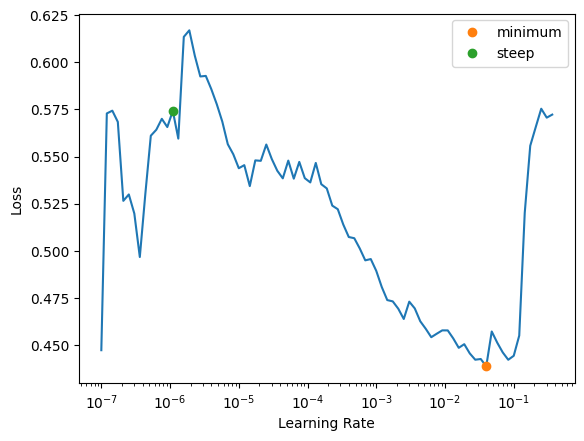

In [ ]:
if trainNewModel:
    learn = tabular_learner(dls, metrics=[rmse, mae])

    # Learning rate finder
    lr_find_results = learn.lr_find(suggest_funcs=(minimum, steep))

    # Debugging information
    print(f"Learning rate finder results: {lr_find_results}")

    # Extract learning rates
    lr_min, lr_steep = lr_find_results

    # Check if learning rates are valid
    if lr_min is None or lr_steep is None or lr_min == 0 or lr_steep == 0:
        raise ValueError("Learning rate finder did not return valid learning rates.")

    # Train
    print(f"Training for {epochs} epochs...")
    learn.fit_one_cycle(epochs, lr_max=lr_steep)
    print("Model training complete")

    learn.export(modelFolder / f'{modelName}.pkl')

## Testing and benchmarking

$CNL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29) (Yahoo error = "Data doesn't exist for startDate = 1703912400, endDate = 1706504400")


Error fetching data for CNL: No historical data available for CNL around 2024-01-29.


$NTG: possibly delisted; no price data found  (period=1d)


Error fetching data for NTG: single positional indexer is out-of-bounds


$JBT: possibly delisted; no price data found  (period=1d)


Error fetching data for JBT: single positional indexer is out-of-bounds


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACLS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACLS&crumb=Edge%3A+Too+Many+Requests
$NXC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NXC: No historical data available for NXC around 2024-01-29.


$SLGN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SLGN: No historical data available for SLGN around 2024-01-29.


$CAE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CAE: No historical data available for CAE around 2024-01-29.


$CRUS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRUS: No historical data available for CRUS around 2024-01-29.


$TGI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TGI: No historical data available for TGI around 2024-01-29.


$TRV: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TRV: No historical data available for TRV around 2024-01-29.


$TROW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TROW: No historical data available for TROW around 2024-01-29.


$NPO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NPO: No historical data available for NPO around 2024-01-29.


$FMNB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FMNB: No historical data available for FMNB around 2024-01-29.


$PFBX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PFBX: No historical data available for PFBX around 2024-01-29.


$PRE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PRE: No historical data available for PRE around 2024-01-29.


$AEE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AEE: No historical data available for AEE around 2024-01-29.


$GEOS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GEOS: No historical data available for GEOS around 2024-01-29.


$MAIN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MAIN: No historical data available for MAIN around 2024-01-29.


$PZC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PZC: No historical data available for PZC around 2024-01-29.


$TG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TG: No historical data available for TG around 2024-01-29.


$NIO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NIO: No historical data available for NIO around 2024-01-29.


$DGICB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DGICB: No historical data available for DGICB around 2024-01-29.


$IAE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for IAE: No historical data available for IAE around 2024-01-29.


$MGPI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MGPI: No historical data available for MGPI around 2024-01-29.


$WSBC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for WSBC: No historical data available for WSBC around 2024-01-29.


$AUDC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AUDC: No historical data available for AUDC around 2024-01-29.


$CWBC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CWBC: No historical data available for CWBC around 2024-01-29.


$HTH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HTH: No historical data available for HTH around 2024-01-29.


$LAKE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LAKE: No historical data available for LAKE around 2024-01-29.


$BSBR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BSBR: No historical data available for BSBR around 2024-01-29.


$SMTC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SMTC: No historical data available for SMTC around 2024-01-29.


$SOL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SOL: No historical data available for SOL around 2024-01-29.


$SJM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SJM: No historical data available for SJM around 2024-01-29.


$TTMI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TTMI: No historical data available for TTMI around 2024-01-29.


$ABBV: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ABBV: No historical data available for ABBV around 2024-01-29.


$TWO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TWO: No historical data available for TWO around 2024-01-29.


$INFY: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for INFY: No historical data available for INFY around 2024-01-29.


$BSX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BSX: No historical data available for BSX around 2024-01-29.


$FCT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FCT: No historical data available for FCT around 2024-01-29.


$GOOD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GOOD: No historical data available for GOOD around 2024-01-29.


$SFL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SFL: No historical data available for SFL around 2024-01-29.


$BCBP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BCBP: No historical data available for BCBP around 2024-01-29.


$TDS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TDS: No historical data available for TDS around 2024-01-29.


$DLR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DLR: No historical data available for DLR around 2024-01-29.


$LMNR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LMNR: No historical data available for LMNR around 2024-01-29.


$DOLE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DOLE: No historical data available for DOLE around 2024-01-29.


$HRB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HRB: No historical data available for HRB around 2024-01-29.


$POOL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for POOL: No historical data available for POOL around 2024-01-29.


$GB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GB: No historical data available for GB around 2024-01-29.


$IBM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for IBM: No historical data available for IBM around 2024-01-29.


$CCZ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CCZ: No historical data available for CCZ around 2024-01-29.


$ASX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ASX: No historical data available for ASX around 2024-01-29.


$ALSN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ALSN: No historical data available for ALSN around 2024-01-29.


$FULT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FULT: No historical data available for FULT around 2024-01-29.


$FCF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FCF: No historical data available for FCF around 2024-01-29.


$PACB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PACB: No historical data available for PACB around 2024-01-29.


$LINE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LINE: No historical data available for LINE around 2024-01-29.


$JPI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for JPI: No historical data available for JPI around 2024-01-29.


$NMT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NMT: No historical data available for NMT around 2024-01-29.


$ASG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ASG: No historical data available for ASG around 2024-01-29.


$LRCX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LRCX: No historical data available for LRCX around 2024-01-29.


$TLK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TLK: No historical data available for TLK around 2024-01-29.


$DM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DM: No historical data available for DM around 2024-01-29.


$MKTX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MKTX: No historical data available for MKTX around 2024-01-29.


$CCL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CCL: No historical data available for CCL around 2024-01-29.


$CL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CL: No historical data available for CL around 2024-01-29.


$PRAA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PRAA: No historical data available for PRAA around 2024-01-29.


$SVM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SVM: No historical data available for SVM around 2024-01-29.


$LNN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LNN: No historical data available for LNN around 2024-01-29.


$AGIO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AGIO: No historical data available for AGIO around 2024-01-29.


$FDX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FDX: No historical data available for FDX around 2024-01-29.


$NWN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NWN: No historical data available for NWN around 2024-01-29.


$MASI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MASI: No historical data available for MASI around 2024-01-29.


$CHH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CHH: No historical data available for CHH around 2024-01-29.


$TRP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TRP: No historical data available for TRP around 2024-01-29.


$LNC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LNC: No historical data available for LNC around 2024-01-29.


$ORCL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ORCL: No historical data available for ORCL around 2024-01-29.


$IP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for IP: No historical data available for IP around 2024-01-29.


$KIM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KIM: No historical data available for KIM around 2024-01-29.


$DMB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DMB: No historical data available for DMB around 2024-01-29.


$CBU: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CBU: No historical data available for CBU around 2024-01-29.


$AMX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AMX: No historical data available for AMX around 2024-01-29.


$PNW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PNW: No historical data available for PNW around 2024-01-29.


$BHK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BHK: No historical data available for BHK around 2024-01-29.


$PWR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PWR: No historical data available for PWR around 2024-01-29.


$GBLI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GBLI: No historical data available for GBLI around 2024-01-29.


$MKSI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MKSI: No historical data available for MKSI around 2024-01-29.


$STK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for STK: No historical data available for STK around 2024-01-29.


$QCRH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for QCRH: No historical data available for QCRH around 2024-01-29.


$CVGW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CVGW: No historical data available for CVGW around 2024-01-29.


$PLAB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PLAB: No historical data available for PLAB around 2024-01-29.


$PFE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PFE: No historical data available for PFE around 2024-01-29.


$FIVE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FIVE: No historical data available for FIVE around 2024-01-29.


$HUN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HUN: No historical data available for HUN around 2024-01-29.


$NNI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NNI: No historical data available for NNI around 2024-01-29.


$CMCSA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CMCSA: No historical data available for CMCSA around 2024-01-29.


$DK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DK: No historical data available for DK around 2024-01-29.


$NXP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NXP: No historical data available for NXP around 2024-01-29.


$ASGN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ASGN: No historical data available for ASGN around 2024-01-29.


$HBI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HBI: No historical data available for HBI around 2024-01-29.


$DENN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DENN: No historical data available for DENN around 2024-01-29.


$NGG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NGG: No historical data available for NGG around 2024-01-29.


$LINC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LINC: No historical data available for LINC around 2024-01-29.


$PGZ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PGZ: No historical data available for PGZ around 2024-01-29.


$JHS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for JHS: No historical data available for JHS around 2024-01-29.


$CROX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CROX: No historical data available for CROX around 2024-01-29.


$SMG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SMG: No historical data available for SMG around 2024-01-29.


$TCI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TCI: No historical data available for TCI around 2024-01-29.


$CMCO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CMCO: No historical data available for CMCO around 2024-01-29.


$PCQ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PCQ: No historical data available for PCQ around 2024-01-29.


$BME: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BME: No historical data available for BME around 2024-01-29.


$CFR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CFR: No historical data available for CFR around 2024-01-29.


$CRL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRL: No historical data available for CRL around 2024-01-29.


$HMY: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HMY: No historical data available for HMY around 2024-01-29.


$BZ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BZ: No historical data available for BZ around 2024-01-29.


$PLCE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PLCE: No historical data available for PLCE around 2024-01-29.


$WLFC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for WLFC: No historical data available for WLFC around 2024-01-29.


$BTT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BTT: No historical data available for BTT around 2024-01-29.


$SMRT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SMRT: No historical data available for SMRT around 2024-01-29.


Failed to get ticker 'PH' reason: Expecting value: line 1 column 1 (char 0)
$PH: possibly delisted; no timezone found


Error fetching data for PH: No historical data available for PH around 2024-01-29.


$PRLB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PRLB: No historical data available for PRLB around 2024-01-29.


$ADTN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ADTN: No historical data available for ADTN around 2024-01-29.


$KLIC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KLIC: No historical data available for KLIC around 2024-01-29.


$HIX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HIX: No historical data available for HIX around 2024-01-29.


Failed to get ticker 'CVE' reason: Expecting value: line 1 column 1 (char 0)
$CVE: possibly delisted; no timezone found


Error fetching data for CVE: No historical data available for CVE around 2024-01-29.


$CMG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CMG: No historical data available for CMG around 2024-01-29.


$HCP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HCP: No historical data available for HCP around 2024-01-29.


$BP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BP: No historical data available for BP around 2024-01-29.


$PBF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PBF: No historical data available for PBF around 2024-01-29.


$AMSF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AMSF: No historical data available for AMSF around 2024-01-29.


$GGB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GGB: No historical data available for GGB around 2024-01-29.


$NOV: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NOV: No historical data available for NOV around 2024-01-29.


$GDL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GDL: No historical data available for GDL around 2024-01-29.


$MANU: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MANU: No historical data available for MANU around 2024-01-29.


$GRMN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GRMN: No historical data available for GRMN around 2024-01-29.


$NAC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NAC: No historical data available for NAC around 2024-01-29.


$ARW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ARW: No historical data available for ARW around 2024-01-29.


$ATLO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ATLO: No historical data available for ATLO around 2024-01-29.


$DKL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DKL: No historical data available for DKL around 2024-01-29.


$CI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CI: No historical data available for CI around 2024-01-29.


$AMH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AMH: No historical data available for AMH around 2024-01-29.


Failed to get ticker 'DOV' reason: Expecting value: line 1 column 1 (char 0)
$DOV: possibly delisted; no timezone found


Error fetching data for DOV: No historical data available for DOV around 2024-01-29.


$KR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KR: No historical data available for KR around 2024-01-29.


$BGX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BGX: No historical data available for BGX around 2024-01-29.


$PM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PM: No historical data available for PM around 2024-01-29.


$ADP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ADP: No historical data available for ADP around 2024-01-29.


$WLDN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for WLDN: No historical data available for WLDN around 2024-01-29.


$FOF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FOF: No historical data available for FOF around 2024-01-29.


$FFNW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FFNW: No historical data available for FFNW around 2024-01-29.


$CMS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CMS: No historical data available for CMS around 2024-01-29.


$ITW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ITW: No historical data available for ITW around 2024-01-29.


$NCA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NCA: No historical data available for NCA around 2024-01-29.


$LEG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LEG: No historical data available for LEG around 2024-01-29.


$T: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for T: No historical data available for T around 2024-01-29.


$LZB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LZB: No historical data available for LZB around 2024-01-29.


$HBAN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HBAN: No historical data available for HBAN around 2024-01-29.


$DJCO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DJCO: No historical data available for DJCO around 2024-01-29.


$M: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for M: No historical data available for M around 2024-01-29.


$CVI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CVI: No historical data available for CVI around 2024-01-29.


$TM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TM: No historical data available for TM around 2024-01-29.


$TMUS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TMUS: No historical data available for TMUS around 2024-01-29.


$BANR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BANR: No historical data available for BANR around 2024-01-29.


$AVT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AVT: No historical data available for AVT around 2024-01-29.


$MDLZ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MDLZ: No historical data available for MDLZ around 2024-01-29.


$PFL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PFL: No historical data available for PFL around 2024-01-29.


$PLL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PLL: No historical data available for PLL around 2024-01-29.


$NBB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NBB: No historical data available for NBB around 2024-01-29.


$JLL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for JLL: No historical data available for JLL around 2024-01-29.


$ACRE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ACRE: No historical data available for ACRE around 2024-01-29.


$ACP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ACP: No historical data available for ACP around 2024-01-29.


$TX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TX: No historical data available for TX around 2024-01-29.


$ASA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ASA: No historical data available for ASA around 2024-01-29.


$FFA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FFA: No historical data available for FFA around 2024-01-29.


$NX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NX: No historical data available for NX around 2024-01-29.


$PDEX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PDEX: No historical data available for PDEX around 2024-01-29.


$DGII: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DGII: No historical data available for DGII around 2024-01-29.


Failed to get ticker 'BMY' reason: Expecting value: line 1 column 1 (char 0)
$BMY: possibly delisted; no timezone found


Error fetching data for BMY: No historical data available for BMY around 2024-01-29.


$KMPR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KMPR: No historical data available for KMPR around 2024-01-29.


$CRT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRT: No historical data available for CRT around 2024-01-29.


$STLD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for STLD: No historical data available for STLD around 2024-01-29.


$AMED: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AMED: No historical data available for AMED around 2024-01-29.


$HXL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HXL: No historical data available for HXL around 2024-01-29.


$AVGO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AVGO: No historical data available for AVGO around 2024-01-29.


$AVY: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AVY: No historical data available for AVY around 2024-01-29.


$ONB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ONB: No historical data available for ONB around 2024-01-29.


$STRA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for STRA: No historical data available for STRA around 2024-01-29.


$OII: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for OII: No historical data available for OII around 2024-01-29.


$FLWS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FLWS: No historical data available for FLWS around 2024-01-29.


$COKE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for COKE: No historical data available for COKE around 2024-01-29.


$SWKS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SWKS: No historical data available for SWKS around 2024-01-29.


$PERF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PERF: No historical data available for PERF around 2024-01-29.


$CWST: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CWST: No historical data available for CWST around 2024-01-29.


$WTBA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for WTBA: No historical data available for WTBA around 2024-01-29.


$TTGT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TTGT: No historical data available for TTGT around 2024-01-29.


$KNOP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KNOP: No historical data available for KNOP around 2024-01-29.


$THR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for THR: No historical data available for THR around 2024-01-29.


$LXU: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LXU: No historical data available for LXU around 2024-01-29.


$NEM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NEM: No historical data available for NEM around 2024-01-29.


$BCC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BCC: No historical data available for BCC around 2024-01-29.


$ABR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ABR: No historical data available for ABR around 2024-01-29.


$TIGR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TIGR: No historical data available for TIGR around 2024-01-29.


$ORMP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ORMP: No historical data available for ORMP around 2024-01-29.


$GLNG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GLNG: No historical data available for GLNG around 2024-01-29.


$DSM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DSM: No historical data available for DSM around 2024-01-29.


$TRNS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TRNS: No historical data available for TRNS around 2024-01-29.


$SNCR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SNCR: No historical data available for SNCR around 2024-01-29.


$AXGN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AXGN: No historical data available for AXGN around 2024-01-29.


$CNC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CNC: No historical data available for CNC around 2024-01-29.


$TRS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TRS: No historical data available for TRS around 2024-01-29.


$CWT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CWT: No historical data available for CWT around 2024-01-29.


$TEN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TEN: No historical data available for TEN around 2024-01-29.


$CRVL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRVL: No historical data available for CRVL around 2024-01-29.


$HSY: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HSY: No historical data available for HSY around 2024-01-29.


$ALGT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ALGT: No historical data available for ALGT around 2024-01-29.


$GCBC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GCBC: No historical data available for GCBC around 2024-01-29.


$KSM: possibly delisted; no price data found  (period=1d)


Error fetching data for KSM: single positional indexer is out-of-bounds


$MAG: possibly delisted; no price data found  (period=1d)


Error fetching data for MAG: single positional indexer is out-of-bounds


$CTSH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CTSH: No historical data available for CTSH around 2024-01-29.


$PAMT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PAMT: No historical data available for PAMT around 2024-01-29.


$HCC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HCC: No historical data available for HCC around 2024-01-29.


$GLDD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GLDD: No historical data available for GLDD around 2024-01-29.


$HLX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HLX: No historical data available for HLX around 2024-01-29.


$ARL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ARL: No historical data available for ARL around 2024-01-29.


$MNKD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MNKD: No historical data available for MNKD around 2024-01-29.


$AL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AL: No historical data available for AL around 2024-01-29.


$ALE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ALE: No historical data available for ALE around 2024-01-29.


$PMX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PMX: No historical data available for PMX around 2024-01-29.


$CLX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CLX: No historical data available for CLX around 2024-01-29.


$CZNC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CZNC: No historical data available for CZNC around 2024-01-29.


$PEO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PEO: No historical data available for PEO around 2024-01-29.


$LTM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LTM: No historical data available for LTM around 2024-01-29.


$C: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for C: No historical data available for C around 2024-01-29.


$GNTX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GNTX: No historical data available for GNTX around 2024-01-29.


$LQDT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LQDT: No historical data available for LQDT around 2024-01-29.


$GM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GM: No historical data available for GM around 2024-01-29.


$DORM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DORM: No historical data available for DORM around 2024-01-29.


$FOLD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FOLD: No historical data available for FOLD around 2024-01-29.


$SMPL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SMPL: No historical data available for SMPL around 2024-01-29.


$TRMK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TRMK: No historical data available for TRMK around 2024-01-29.


$DB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DB: No historical data available for DB around 2024-01-29.


$DLX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DLX: No historical data available for DLX around 2024-01-29.


$CRH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRH: No historical data available for CRH around 2024-01-29.


$IIM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for IIM: No historical data available for IIM around 2024-01-29.


$STXS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for STXS: No historical data available for STXS around 2024-01-29.


$CPHC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CPHC: No historical data available for CPHC around 2024-01-29.


$ASUR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ASUR: No historical data available for ASUR around 2024-01-29.


$PBA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PBA: No historical data available for PBA around 2024-01-29.


$ATO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ATO: No historical data available for ATO around 2024-01-29.


$GPOR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GPOR: No historical data available for GPOR around 2024-01-29.


$LNT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LNT: No historical data available for LNT around 2024-01-29.


$ASYS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ASYS: No historical data available for ASYS around 2024-01-29.


$KMT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KMT: No historical data available for KMT around 2024-01-29.


$HVT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HVT: No historical data available for HVT around 2024-01-29.


$TCBI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TCBI: No historical data available for TCBI around 2024-01-29.


$TEX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TEX: No historical data available for TEX around 2024-01-29.


$ARI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ARI: No historical data available for ARI around 2024-01-29.


$MAR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MAR: No historical data available for MAR around 2024-01-29.


$CSIQ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CSIQ: No historical data available for CSIQ around 2024-01-29.


$FBP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FBP: No historical data available for FBP around 2024-01-29.


$MITK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MITK: No historical data available for MITK around 2024-01-29.


$FOR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FOR: No historical data available for FOR around 2024-01-29.


$FORTY: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FORTY: No historical data available for FORTY around 2024-01-29.


$HBNC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HBNC: No historical data available for HBNC around 2024-01-29.


$ITT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ITT: No historical data available for ITT around 2024-01-29.


$BDC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BDC: No historical data available for BDC around 2024-01-29.


$BCPC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BCPC: No historical data available for BCPC around 2024-01-29.


$BHP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BHP: No historical data available for BHP around 2024-01-29.


$PSMT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PSMT: No historical data available for PSMT around 2024-01-29.


$DHF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DHF: No historical data available for DHF around 2024-01-29.


$CR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CR: No historical data available for CR around 2024-01-29.


$SYK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SYK: No historical data available for SYK around 2024-01-29.


$LFUS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LFUS: No historical data available for LFUS around 2024-01-29.


$POST: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for POST: No historical data available for POST around 2024-01-29.


$GABC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GABC: No historical data available for GABC around 2024-01-29.


$LOW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LOW: No historical data available for LOW around 2024-01-29.


$CWH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CWH: No historical data available for CWH around 2024-01-29.


$SSD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SSD: No historical data available for SSD around 2024-01-29.


$TOWN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TOWN: No historical data available for TOWN around 2024-01-29.


$ACNB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ACNB: No historical data available for ACNB around 2024-01-29.


$ARTNA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ARTNA: No historical data available for ARTNA around 2024-01-29.


$HQH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HQH: No historical data available for HQH around 2024-01-29.


$STT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for STT: No historical data available for STT around 2024-01-29.


$MANH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MANH: No historical data available for MANH around 2024-01-29.


$WYNN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for WYNN: No historical data available for WYNN around 2024-01-29.


$JNPR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for JNPR: No historical data available for JNPR around 2024-01-29.


$ACI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ACI: No historical data available for ACI around 2024-01-29.


$OXLCO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for OXLCO: No historical data available for OXLCO around 2024-01-29.


$KAR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KAR: No historical data available for KAR around 2024-01-29.


$A: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for A: No historical data available for A around 2024-01-29.


$SNA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SNA: No historical data available for SNA around 2024-01-29.


$PSA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PSA: No historical data available for PSA around 2024-01-29.


$AEF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AEF: No historical data available for AEF around 2024-01-29.


$MMYT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MMYT: No historical data available for MMYT around 2024-01-29.


$BR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BR: No historical data available for BR around 2024-01-29.


$TDF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TDF: No historical data available for TDF around 2024-01-29.


$CRNT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRNT: No historical data available for CRNT around 2024-01-29.


$LTRX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LTRX: No historical data available for LTRX around 2024-01-29.


$TRGP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TRGP: No historical data available for TRGP around 2024-01-29.


$ACN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ACN: No historical data available for ACN around 2024-01-29.


$DRI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DRI: No historical data available for DRI around 2024-01-29.


$AMG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AMG: No historical data available for AMG around 2024-01-29.


$LION: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LION: No historical data available for LION around 2024-01-29.


$PTEN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PTEN: No historical data available for PTEN around 2024-01-29.


$IT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for IT: No historical data available for IT around 2024-01-29.


$CVCO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CVCO: No historical data available for CVCO around 2024-01-29.


$LDP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LDP: No historical data available for LDP around 2024-01-29.


$CRT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRT: No historical data available for CRT around 2024-01-29.


$LMNR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LMNR: No historical data available for LMNR around 2024-01-29.


$HLIT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HLIT: No historical data available for HLIT around 2024-01-29.


$LNN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LNN: No historical data available for LNN around 2024-01-29.


$ODC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ODC: No historical data available for ODC around 2024-01-29.


$GGB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GGB: No historical data available for GGB around 2024-01-29.


$COKE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for COKE: No historical data available for COKE around 2024-01-29.


$SRDX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SRDX: No historical data available for SRDX around 2024-01-29.


$ALX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ALX: No historical data available for ALX around 2024-01-29.


$SOL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SOL: No historical data available for SOL around 2024-01-29.


$PCG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PCG: No historical data available for PCG around 2024-01-29.


$CMCSA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CMCSA: No historical data available for CMCSA around 2024-01-29.


$LMT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LMT: No historical data available for LMT around 2024-01-29.


$CSX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CSX: No historical data available for CSX around 2024-01-29.


$CYD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CYD: No historical data available for CYD around 2024-01-29.


$WSFS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for WSFS: No historical data available for WSFS around 2024-01-29.


$PEB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PEB: No historical data available for PEB around 2024-01-29.


$ALGT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ALGT: No historical data available for ALGT around 2024-01-29.


$HLX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HLX: No historical data available for HLX around 2024-01-29.


$KKR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KKR: No historical data available for KKR around 2024-01-29.


$PEP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PEP: No historical data available for PEP around 2024-01-29.


$CMG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CMG: No historical data available for CMG around 2024-01-29.


$T: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for T: No historical data available for T around 2024-01-29.


$AMH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AMH: No historical data available for AMH around 2024-01-29.


$MIDD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MIDD: No historical data available for MIDD around 2024-01-29.


$SWI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SWI: No historical data available for SWI around 2024-01-29.


$HIX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HIX: No historical data available for HIX around 2024-01-29.


$TMUS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TMUS: No historical data available for TMUS around 2024-01-29.


$STZ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for STZ: No historical data available for STZ around 2024-01-29.


$PFN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PFN: No historical data available for PFN around 2024-01-29.


$SFL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SFL: No historical data available for SFL around 2024-01-29.


$BNY: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BNY: No historical data available for BNY around 2024-01-29.


$HUN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HUN: No historical data available for HUN around 2024-01-29.


$POOL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for POOL: No historical data available for POOL around 2024-01-29.


$KNDI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KNDI: No historical data available for KNDI around 2024-01-29.


$AMRC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AMRC: No historical data available for AMRC around 2024-01-29.


$KYN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KYN: No historical data available for KYN around 2024-01-29.


$HOVNP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HOVNP: No historical data available for HOVNP around 2024-01-29.


$ALEX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ALEX: No historical data available for ALEX around 2024-01-29.


$FLXS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FLXS: No historical data available for FLXS around 2024-01-29.


$WLFC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for WLFC: No historical data available for WLFC around 2024-01-29.


$LEG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LEG: No historical data available for LEG around 2024-01-29.


$PNW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PNW: No historical data available for PNW around 2024-01-29.


$HBNC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HBNC: No historical data available for HBNC around 2024-01-29.


$AXGN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AXGN: No historical data available for AXGN around 2024-01-29.


$FI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FI: No historical data available for FI around 2024-01-29.


$PAA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)
$AEF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PAA: No historical data available for PAA around 2024-01-29.
Error fetching data for AEF: No historical data available for AEF around 2024-01-29.


$PWR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PWR: No historical data available for PWR around 2024-01-29.


$CNQ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CNQ: No historical data available for CNQ around 2024-01-29.


$THR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for THR: No historical data available for THR around 2024-01-29.


$GSBC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GSBC: No historical data available for GSBC around 2024-01-29.


$PM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PM: No historical data available for PM around 2024-01-29.


$BXP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BXP: No historical data available for BXP around 2024-01-29.


$FFIV: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FFIV: No historical data available for FFIV around 2024-01-29.


$GES: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GES: No historical data available for GES around 2024-01-29.


$JNPR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for JNPR: No historical data available for JNPR around 2024-01-29.


$BRFS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BRFS: No historical data available for BRFS around 2024-01-29.


$FNLC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FNLC: No historical data available for FNLC around 2024-01-29.


$BYD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BYD: No historical data available for BYD around 2024-01-29.


$MANH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MANH: No historical data available for MANH around 2024-01-29.


$CRVL: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CRVL: No historical data available for CRVL around 2024-01-29.


$CTBI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CTBI: No historical data available for CTBI around 2024-01-29.


$NEM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NEM: No historical data available for NEM around 2024-01-29.


$CIEN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CIEN: No historical data available for CIEN around 2024-01-29.


$CSIQ: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CSIQ: No historical data available for CSIQ around 2024-01-29.


$CBU: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CBU: No historical data available for CBU around 2024-01-29.


$LBTYK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LBTYK: No historical data available for LBTYK around 2024-01-29.


$AUDC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AUDC: No historical data available for AUDC around 2024-01-29.


$ADC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ADC: No historical data available for ADC around 2024-01-29.


$HRB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HRB: No historical data available for HRB around 2024-01-29.


$PKBK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PKBK: No historical data available for PKBK around 2024-01-29.


$PKX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PKX: No historical data available for PKX around 2024-01-29.


$CAT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CAT: No historical data available for CAT around 2024-01-29.


$FUN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FUN: No historical data available for FUN around 2024-01-29.


$KMT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KMT: No historical data available for KMT around 2024-01-29.


$KO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for KO: No historical data available for KO around 2024-01-29.


$ACP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ACP: No historical data available for ACP around 2024-01-29.


$SMBC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for SMBC: No historical data available for SMBC around 2024-01-29.


$PLD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PLD: No historical data available for PLD around 2024-01-29.


Failed to get ticker 'DOV' reason: Expecting value: line 1 column 1 (char 0)
$DOV: possibly delisted; no timezone found


Error fetching data for DOV: No historical data available for DOV around 2024-01-29.


$DSM: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for DSM: No historical data available for DSM around 2024-01-29.


$HTD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HTD: No historical data available for HTD around 2024-01-29.


$ADP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ADP: No historical data available for ADP around 2024-01-29.


$LYV: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LYV: No historical data available for LYV around 2024-01-29.


$ACRE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ACRE: No historical data available for ACRE around 2024-01-29.


$PFBX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PFBX: No historical data available for PFBX around 2024-01-29.


$GBLI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GBLI: No historical data available for GBLI around 2024-01-29.


$FCNCA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FCNCA: No historical data available for FCNCA around 2024-01-29.


$TGI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TGI: No historical data available for TGI around 2024-01-29.


$LXU: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for LXU: No historical data available for LXU around 2024-01-29.


$OXLCO: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for OXLCO: No historical data available for OXLCO around 2024-01-29.


$FCF: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for FCF: No historical data available for FCF around 2024-01-29.


$CAE: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CAE: No historical data available for CAE around 2024-01-29.


$MGPI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for MGPI: No historical data available for MGPI around 2024-01-29.


$HCP: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HCP: No historical data available for HCP around 2024-01-29.


$NOK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for NOK: No historical data available for NOK around 2024-01-29.


$BCC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BCC: No historical data available for BCC around 2024-01-29.


$AXR: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for AXR: No historical data available for AXR around 2024-01-29.


$GWW: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for GWW: No historical data available for GWW around 2024-01-29.


$TK: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for TK: No historical data available for TK around 2024-01-29.


$BBSI: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BBSI: No historical data available for BBSI around 2024-01-29.


$BNS: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BNS: No historical data available for BNS around 2024-01-29.


$BGX: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for BGX: No historical data available for BGX around 2024-01-29.


$HCA: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for HCA: No historical data available for HCA around 2024-01-29.


$ALG: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ALG: No historical data available for ALG around 2024-01-29.


$STLD: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for STLD: No historical data available for STLD around 2024-01-29.


$ARCC: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for ARCC: No historical data available for ARCC around 2024-01-29.


$CHN: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CHN: No historical data available for CHN around 2024-01-29.


$PACB: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for PACB: No historical data available for PACB around 2024-01-29.


$CHH: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for CHH: No historical data available for CHH around 2024-01-29.


$JBT: possibly delisted; no price data found  (1d 2023-12-30 -> 2024-01-29)


Error fetching data for JBT: No historical data available for JBT around 2024-01-29.


Failed to get ticker 'CVE' reason: Expecting value: line 1 column 1 (char 0)
$CVE: possibly delisted; no timezone found


Error fetching data for CVE: No historical data available for CVE around 2024-01-29.


$DGICB: possibly delisted; no price data found  (period=1d)


Error fetching data for DGICB: single positional indexer is out-of-bounds


Logged evaluation results to c:\Users\Gamer\Documents\GitHub\VS-Code\Side-Projects\TrainedModels\stockScreener\modelEvaluations.csv


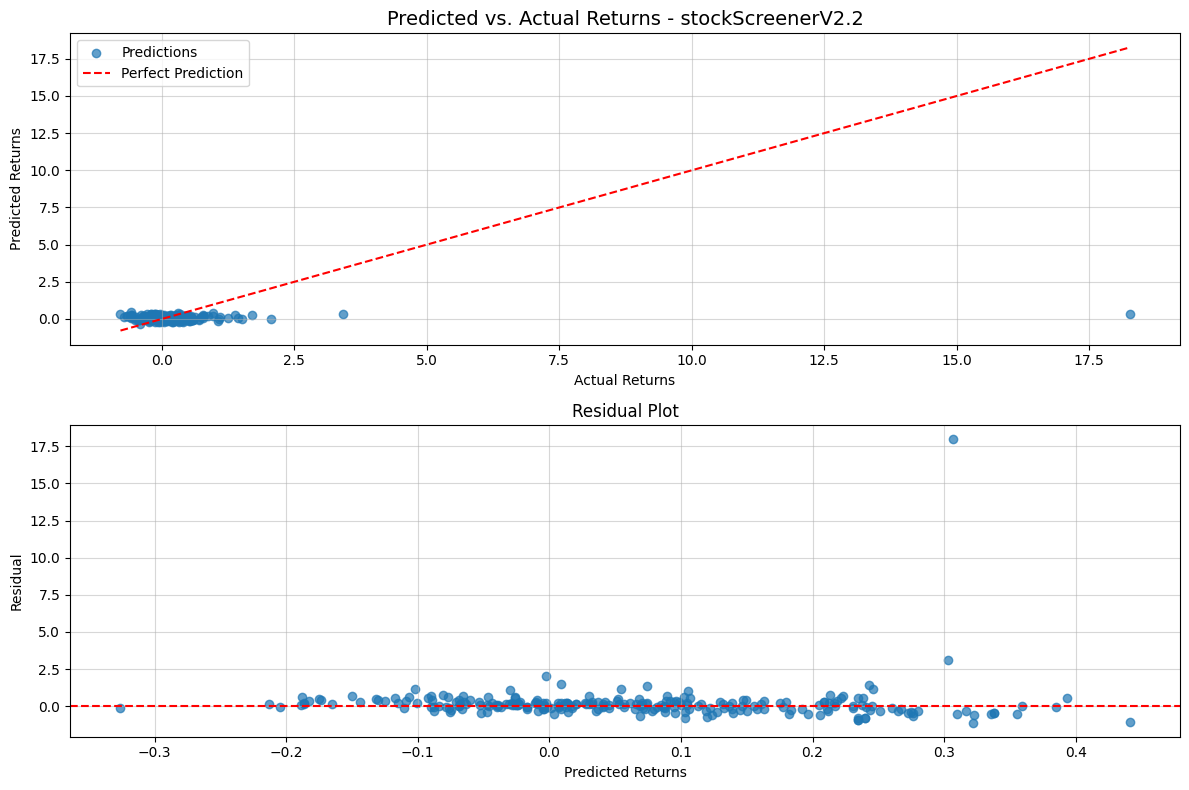

Collected 250 valid test tickers (target: 250)

Evaluation Results:
MAE: 0.400
RMSE: 1.232
R²: -0.003


In [ ]:
def logEvaluation(model_name, mae, rmse, r2, model_folder, test_tickers):
    """Log evaluation metrics to CSV file"""
    log_file = model_folder / "modelEvaluations.csv"
    
    new_entry_df = pd.DataFrame([{
        "Model Name": model_name,
        "Timestamp": datetime.now().strftime('%Y-%m-%d %H:%M'),
        "MAE": f'{mae:.3f}',
        "RMSE": f'{rmse:.3f}',
        "R2": f'{r2:.3f}',
        "Epochs": epochs,
        "Training Size": trainingSize,
        "Training Rows": trainingRowAmount,
        "Test Size": len(test_tickers),
        "Cat Names": catNames,
        "Cont Names": contNames,
    }])
    
    try:
        log_df = pd.read_csv(log_file)
        log_df = pd.concat([log_df, new_entry_df], ignore_index=True)
    except FileNotFoundError:
        log_df = new_entry_df
        
    log_df.to_csv(log_file, index=False)
    print(f"Logged evaluation results to {log_file}")

def plotResults(results_df, model_name, model_folder):
    """Create and save visualization plots using all data points."""
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.7, label='Predictions')
    min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
    max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'Predicted vs. Actual Returns - {model_name}', fontsize=14)
    plt.xlabel('Actual Returns')
    plt.ylabel('Predicted Returns')
    plt.legend()
    plt.grid(alpha=0.5)
    
    plt.subplot(2, 1, 2)
    plt.scatter(results_df['Predicted'], results_df['Residual'], alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Returns')
    plt.ylabel('Residual')
    plt.grid(alpha=0.5)
    
    plt.tight_layout()
    plt.show()

if trainNewModel:
    nonTrainingTickers = list(set(tickers) - set(trainingTickers))
    validTestData = []
    attempted_tickers = set()
    attempts = 0

    if testSize * 4 <= len(tickers):  
        max_attempts = testSize * 4 # Prevent infinite loops
    else:
        max_attempts = len(tickers)

    # Keep trying until we reach testSize or exhaust attempts
    while len(validTestData) < testSize and attempts < max_attempts:
        # Get a new ticker we haven't tried yet
        remaining_tickers = [t for t in nonTrainingTickers if t not in attempted_tickers]
        if not remaining_tickers:  # If all tried, reset attempted list
            attempted_tickers = set()
            remaining_tickers = nonTrainingTickers
            
        ticker = np.random.choice(remaining_tickers)
        attempted_tickers.add(ticker)
        attempts += 1

        # Fetch and validate data
        data = getTickerDataFrom1YrAgo(ticker)
        if not data.empty and not data[['EV/EBIT', 'ROIC']].isna().any().any():
            validTestData.append(data)

    if not validTestData:
        raise ValueError("No valid test data collected after multiple attempts")
        
    # Trim to exact testSize if we collected more
    validTestData = validTestData[:testSize]  
    combinedTestData = pd.concat(validTestData, ignore_index=True)

    # Clean data
    test_data_clean = combinedTestData.dropna(subset=['EV/EBIT', 'ROIC', 'Future Year Change'])
    
    if test_data_clean.empty:
        raise ValueError("No valid test data after cleaning NaN values")

    # Create test dataloader
    test_dl = learn.dls.test_dl(test_data_clean)
    preds, targs = learn.get_preds(dl=test_dl)
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Predicted': preds.numpy().flatten(),
        'Actual': targs.numpy().flatten()
    })
    results_df['Residual'] = results_df['Actual'] - results_df['Predicted']

    # Calculate metrics
    mae = np.mean(np.abs(results_df['Residual']))
    rmse = np.sqrt(np.mean(results_df['Residual']**2))
    r2 = 1 - (np.sum(results_df['Residual']**2) / np.sum((results_df['Actual'] - results_df['Actual'].mean())**2))

    # Log and plot
    logEvaluation(modelName, mae, rmse, r2, modelFolder, test_data_clean['Ticker'].unique())
    plotResults(results_df, modelName, modelFolder)

    # Show collection stats
    print(f"Collected {len(validTestData)} valid test tickers (target: {testSize})")
    if attempts >= max_attempts:
        print(f"Warning: Reached max attempts ({max_attempts}). Some invalid tickers may remain.")  
    print(f"\nEvaluation Results:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")

## Predictions

In [ ]:
print('Model files in modelFolder:')
for file in modelFolder.glob('*.pkl'):
    print(file.name)

Model files in modelFolder:
stockScreenerV1.0.pkl
stockScreenerV1.1.pkl
stockScreenerV1.10.pkl
stockScreenerV1.2.pkl
stockScreenerV1.3.pkl
stockScreenerV1.4.pkl
stockScreenerV1.5.pkl
stockScreenerV1.6.pkl
stockScreenerV1.7.pkl
stockScreenerV1.8.pkl
stockScreenerV1.9.pkl
stockScreenerV2.0.pkl
stockScreenerV2.1.pkl
stockScreenerV2.2.pkl


In [ ]:
evaluations = pd.read_csv(modelFolder / 'modelEvaluations.csv')
bestModel = evaluations.sort_values('MAE', ascending=True).iloc[0]
bestModel.head()

Model Name    stockScreenerV1.7
Timestamp      2025-01-27 08:45
MAE                       0.328
RMSE                      0.739
R2                        0.077
Name: 7, dtype: object

### Load model

In [ ]:
if os.name == 'nt':
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
else:
    pathlib.WindowsPath = pathlib.PosixPath

importedModel = Path(f"{bestModel['Model Name']}.pkl") # Change this if you want to try other models
learn = load_learner(modelFolder / importedModel)

In [ ]:
#predictionTarget = '95%'

In [ ]:
if predictionTarget != 'None':
    if predictionTarget == 'ALL':
        predictionTickers = tickers
    elif predictionTarget.endswith('%'):
        percentage = float(predictionTarget.strip('%')) / 100
        num_tickers = int(len(tickers) * percentage)
        predictionTickers = np.random.choice(tickers, size=num_tickers, replace=False).tolist()
    else:
        predictionTickers = [predictionTarget]

    # Fetch data for prediction tickers
    dfPrediction = pd.concat([getTickerData(ticker) for ticker in predictionTickers], ignore_index=True)

    # Ensure dfPrediction is a DataFrame
    if isinstance(dfPrediction, dict):
        dfPrediction = pd.DataFrame([dfPrediction])

    # Drop rows with NaN values in 'EV/EBIT' or 'ROIC'
    dfPrediction = dfPrediction.dropna(subset=['EV/EBIT', 'ROIC'])

    # Create test dataloader
    dl = learn.dls.test_dl(dfPrediction)
    dfPrediction.head()

    # Make predictions
    prediction = learn.get_preds(dl=dl)
    adr_df = pd.read_csv(testFolder / 'filteredTickers.csv')
    company_dict = dict(zip(adr_df['Ticker'], adr_df['Company']))

    if predictionTarget == 'ALL' or predictionTarget.endswith('%'):
        sorted_predictions = sorted(zip(predictionTickers, prediction[0]), key=lambda x: x[1], reverse=True)
        print(f"Got predictions for {len(sorted_predictions)} tickers, expected: {len(predictionTickers)}")
        print(f"Prediction for best performing tickers:")
        for symbol, pred in sorted_predictions:
            company_name = company_dict.get(symbol, 'Unknown')
            print(f"{symbol} ({company_name}): {pred[0].item() * 100:.2f}%")
    else:
        company_name = company_dict.get(predictionTarget, 'Unknown')
        print(f"Prediction for {predictionTarget} ({company_name}):")
        print(f"{prediction[0][0][0].item() * 100:.2f}%")
    print("Free money?!")

Prediction for DRS (Unknown):
0.99%
Free money?!
